#EDA

In [46]:
##Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [47]:
## Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
##Defining the data frame
file_path_train = '/content/drive/MyDrive/Machine Learning-Final Project/Data/train.csv'
file_path_test = '/content/drive/MyDrive/Machine Learning-Final Project/Data/test.csv'
file_path_macro = '/content/drive/MyDrive/Machine Learning-Final Project/Data/macro.csv'
pd.set_option('display.max_columns', None)
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)
macro_data = pd.read_csv(file_path_macro)

In [49]:
macro_data.head()

timestamp  oil_urals  gdp_quart  gdp_quart_growth  cpi  ppi  gdp_deflator  \
0  2010-01-01       76.1        NaN               NaN  NaN  NaN           NaN   
1  2010-01-02       76.1        NaN               NaN  NaN  NaN           NaN   
2  2010-01-03       76.1        NaN               NaN  NaN  NaN           NaN   
3  2010-01-04       76.1        NaN               NaN  NaN  NaN           NaN   
4  2010-01-05       76.1        NaN               NaN  NaN  NaN           NaN   

   balance_trade  balance_trade_growth  usdrub   eurrub  brent  \
0            NaN                   NaN     NaN      NaN    NaN   
1            NaN                   NaN     NaN      NaN    NaN   
2            NaN                   NaN     NaN      NaN    NaN   
3            NaN                   NaN  29.905  43.4054  80.12   
4            NaN                   NaN  29.836  42.9600  80.59   

   net_capital_export  gdp_annual  gdp_annual_growth  \
0                 NaN     38807.2          -0.078209   
1                 NaN     38807.2          -0.078209   
2                 NaN     38807.2          -0.078209   
3                 NaN     38807.2          -0.078209   
4                 NaN     38807.2          -0.078209   

   average_provision_of_build_contract  \
0                                  5.0   
1                                  5.0   
2                                  5.0   
3                                  5.0   
4                                  5.0   

   average_provision_of_build_contract_moscow  rts  micex  micex_rgbi_tr  \
0                                         NaN  NaN    NaN            NaN   
1                                         NaN  NaN    NaN            NaN   
2                                         NaN  NaN    NaN            NaN   
3                                         NaN  NaN    NaN            NaN   
4                                         NaN  NaN    NaN            NaN   

   micex_cbi_tr  deposits_value  deposits_growth  deposits_rate  \
0           NaN         7484970              NaN            NaN   
1        175.15         7484970              NaN            NaN   
2        178.66         7484970              NaN            NaN   
3        183.44         7484970              NaN            NaN   
4        183.44         7484970              NaN            NaN   

   mortgage_value  mortgage_growth  mortgage_rate        grp  grp_growth  \
0          142968              NaN          13.72  8375.8638         NaN   
1          142968              NaN          13.72  8375.8638         NaN   
2          142968              NaN          13.72  8375.8638         NaN   
3          142968              NaN          13.72  8375.8638         NaN   
4          142968              NaN          13.72  8375.8638         NaN   

   income_per_cap  real_dispos_income_per_cap_growth   salary  salary_growth  \
0         30789.2                              0.038  38410.5            NaN   
1         30789.2                              0.038  38410.5            NaN   
2         30789.2                              0.038  38410.5            NaN   
3         30789.2                              0.038  38410.5            NaN   
4         30789.2                              0.038  38410.5            NaN   

   fixed_basket  retail_trade_turnover  retail_trade_turnover_per_cap  \
0      11443.63              2882.4169                        251.484   
1      11443.63              2882.4169                        251.484   
2      11443.63              2882.4169                        251.484   
3      11443.63              2882.4169                        251.484   
4      11443.63              2882.4169                        251.484   

   retail_trade_turnover_growth  labor_force  unemployment  employment  \
0                         106.8     6436.244         0.018        0.69   
1                         106.8     6436.244         0.018        0.69   
2                         106.8     6436.244         0.018        0.69 

In [50]:
macro_data['timestamp'] = pd.to_datetime(macro_data['timestamp'])
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])


train_df = train_df.merge(macro_data, on='timestamp', how='left')

<ipython-input-50-76cc63daa451>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])


In [51]:
macro_data['timestamp'] = pd.to_datetime(macro_data['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])


test_df = test_df.merge(macro_data, on='timestamp', how='left')

In [52]:
train_df.shape

(30471, 391)

In [53]:
pd.set_option('display.max_rows', None)
train_df.describe().T

count  \
id                                          30471.0   
timestamp                                     30471   
full_sq                                     30471.0   
life_sq                                     24088.0   
floor                                       30304.0   
max_floor                                   20899.0   
material                                    20899.0   
build_year                                  16866.0   
num_room                                    20899.0   
kitch_sq                                    20899.0   
state                                       16912.0   
area_m                                      30471.0   
raion_popul                                 30471.0   
green_zone_part                             30471.0   
indust_part                                 30471.0   
children_preschool                          30471.0   
preschool_quota                             23783.0   
preschool_education_centers_raion           30471.0   
children_school                             30471.0   
school_quota                                23786.0   
school_education_centers_raion              30471.0   
school_education_centers_top_20_raion       30471.0   
hospital_beds_raion                         16030.0   
healthcare_centers_raion                    30471.0   
university_top_20_raion                     30471.0   
sport_objects_raion                         30471.0   
additional_education_raion                  30471.0   
culture_objects_top_25_raion                30471.0   
shopping_centers_raion                      30471.0   
office_raion                                30471.0   
full_all                                    30471.0   
male_f                                      30471.0   
female_f                                    30471.0   
young_all                                   30471.0   
young_male                                  30471.0   
young_female                                30471.0   
work_all                                    30471.0   
work_male                                   30471.0   
work_female                                 30471.0   
ekder_all                                   30471.0   
ekder_male                                  30471.0   
ekder_female                                30471.0   
0_6_all                                     30471.0   
0_6_male                                    30471.0   
0_6_female                                  30471.0   
7_14_all                                    30471.0   
7_14_male                                   30471.0   
7_14_female                                 30471.0   
0_17_all                                    30471.0   
0_17_male                                   30471.0   
0_17_female                                 30471.0   
16_29_all                                   30471.0   
16_29_male                                  30471.0   
16_29_female                                30471.0   
0_13_all                                    30471.0   
0_13_male                                   30471.0   
0_13_female                                 30471.0   
raion_build_count_with_material_info        25480.0   
build_count_block                           25480.0   
build_count_wood                            25480.0   
build_count_frame                           25480.0   
build_count_brick                           25480.0   
build_count_monolith                        25480.0   
build_count_panel                           25480.0   
build_count_foam                            25480.0   
build_count_slag                            25480.0   
build_count_mix                             25480.0   
raion_build_count_with_builddate_info       25480.0   
build_count_before_1920                     25480.0   
build_count_1921-1945                       25480.0   
build_count_1946-1970                       25480.0   
build_count_1971-1995                       25480.0   
build_count_after_1995         

In [54]:
# Examine frequency distributions for each categorical feature
categorical_columns = train_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Frequency distribution for {col}:")
    print(train_df[col].value_counts())
    print("\n")


Frequency distribution for product_type:
product_type
Investment       19448
OwnerOccupier    11023
Name: count, dtype: int64


Frequency distribution for sub_area:
sub_area
Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
Otradnoe                           353
Nagatinskij Zaton                  327
Bogorodskoe                        305
Nagornoe                           305
Strogino                           301
Izmajlovo                          300
Tekstil

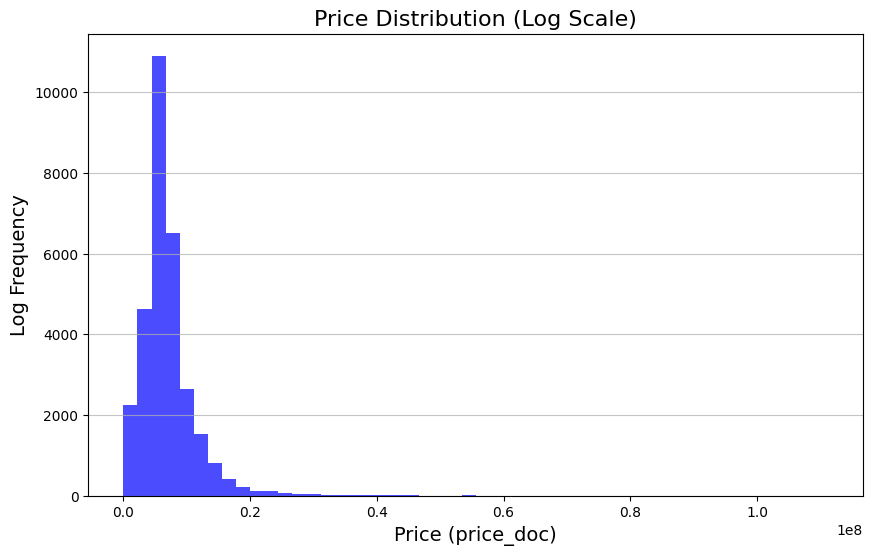

In [55]:
##Plotting price
plt.figure(figsize=(10, 6))
plt.hist(train_df['price_doc'], bins=50, color='blue', alpha=0.7)
plt.title('Price Distribution (Log Scale)', fontsize=16)
plt.xlabel('Price (price_doc)', fontsize=14)
plt.ylabel('Log Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [56]:
train_df['log_price_doc'] = np.log1p(train_df['price_doc'])

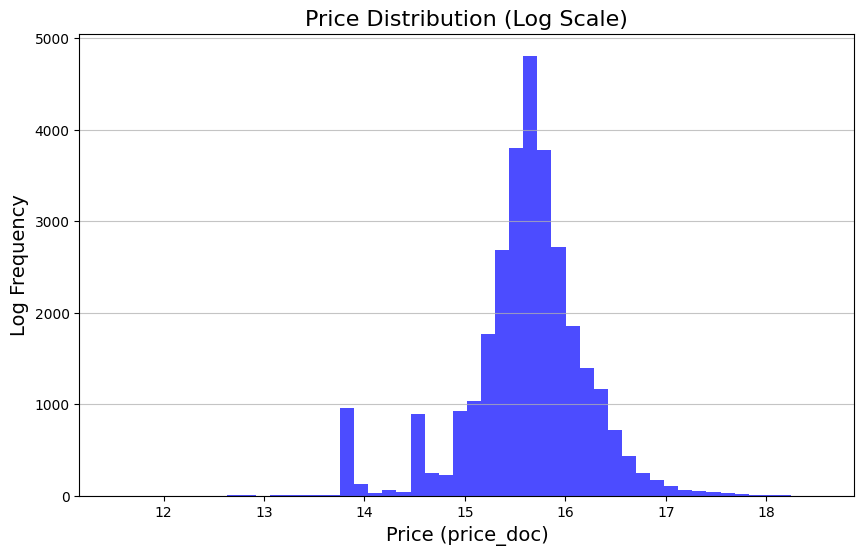

In [57]:
##Plotting log price
plt.figure(figsize=(10, 6))
plt.hist(train_df['log_price_doc'], bins=50, color='blue', alpha=0.7)
plt.title('Price Distribution (Log Scale)', fontsize=16)
plt.xlabel('Price (price_doc)', fontsize=14)
plt.ylabel('Log Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [58]:
missing_values = train_df.isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_values)

id                                                0
timestamp                                         0
full_sq                                           0
life_sq                                        6383
floor                                           167
max_floor                                      9572
material                                       9572
build_year                                    13605
num_room                                       9572
kitch_sq                                       9572
state                                         13559
product_type                                      0
sub_area                                          0
area_m                                            0
raion_popul                                       0
green_zone_part                                   0
indust_part                                       0
children_preschool                                0
preschool_quota                                6688
preschool_ed

In [59]:
# Filter columns with missing values
missing_values_with_na = missing_values[missing_values > 0]

print("Missing Values:")
print(missing_values_with_na)

Missing Values:
life_sq                                    6383
floor                                       167
max_floor                                  9572
material                                   9572
build_year                                13605
num_room                                   9572
kitch_sq                                   9572
state                                     13559
preschool_quota                            6688
school_quota                               6685
hospital_beds_raion                       14441
raion_build_count_with_material_info       4991
build_count_block                          4991
build_count_wood                           4991
build_count_frame                          4991
build_count_brick                          4991
build_count_monolith                       4991
build_count_panel                          4991
build_count_foam                           4991
build_count_slag                           4991
build_count_mix         

In [60]:
missing_values = test_df.isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_values)

id                                               0
timestamp                                        0
full_sq                                          0
life_sq                                       1176
floor                                            0
max_floor                                        0
material                                         0
build_year                                    1049
num_room                                         0
kitch_sq                                         0
state                                          694
product_type                                    33
sub_area                                         0
area_m                                           0
raion_popul                                      0
green_zone_part                                  0
indust_part                                      0
children_preschool                               0
preschool_quota                               1596
preschool_education_centers_rai

<ipython-input-61-6986a9bd0a0c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_na.index, y=train_na, palette="viridis")


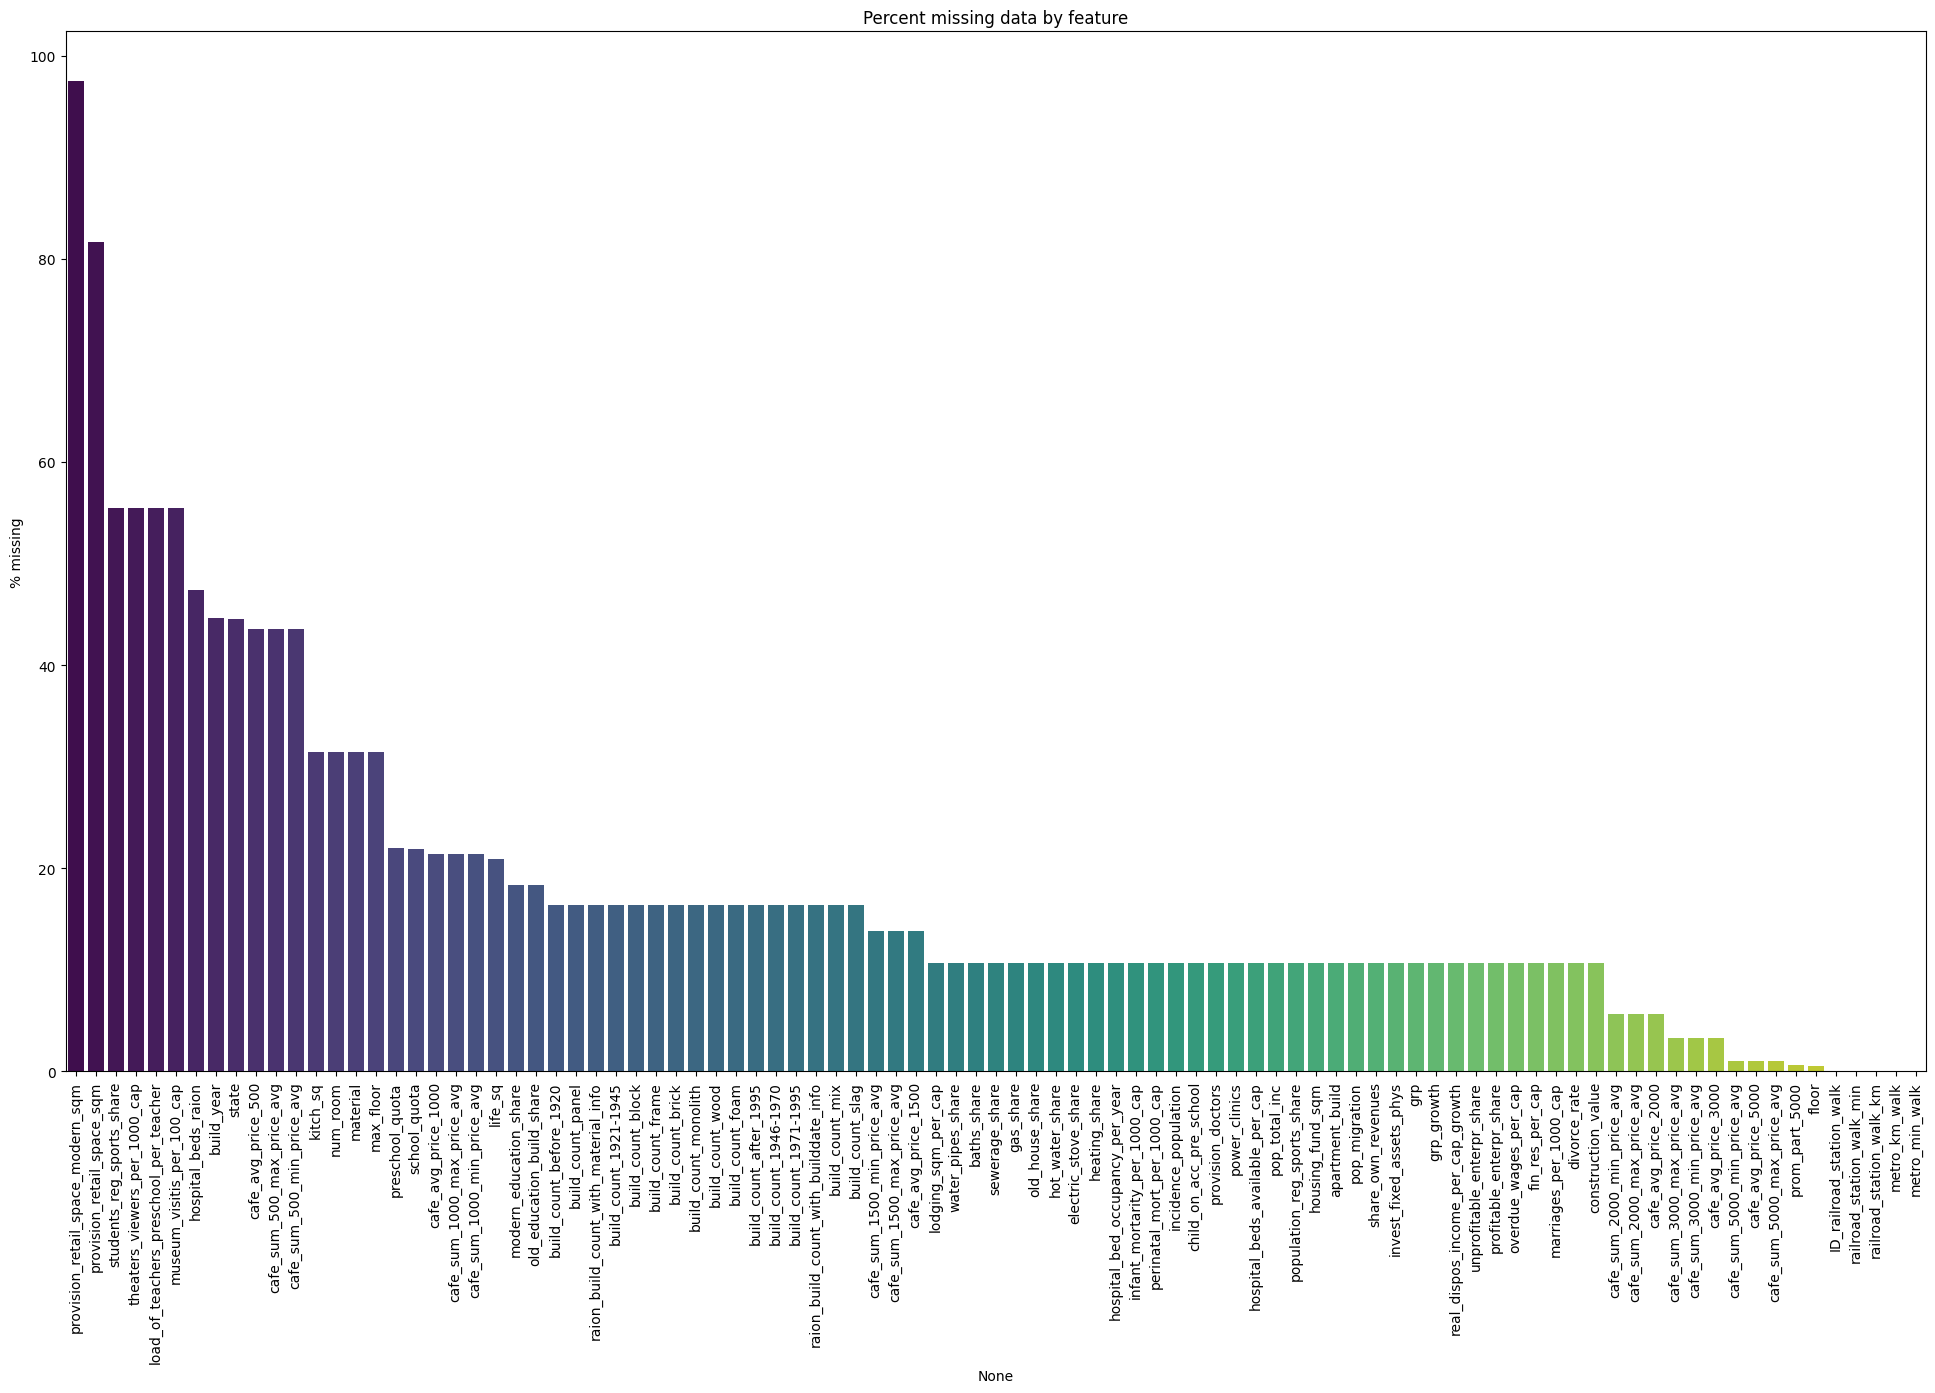

In [61]:
#Plotting missing values
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)


f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation=90)
sns.barplot(x=train_na.index, y=train_na, palette="viridis")
ax.set(title='Percent missing data by feature', ylabel='% missing')
plt.subplots_adjust(top=0.95, bottom=0.3)
plt.show()

In [62]:
#Types
column_info = pd.DataFrame({
    'Data Type': train_df.dtypes,
    'Unique Values': train_df.nunique()
})
print(column_info)

                                                 Data Type  Unique Values
id                                                   int64          30471
timestamp                                   datetime64[ns]           1161
full_sq                                              int64            211
life_sq                                            float64            175
floor                                              float64             41
max_floor                                          float64             49
material                                           float64              6
build_year                                         float64            119
num_room                                           float64             13
kitch_sq                                           float64             74
state                                              float64              5
product_type                                        object              2
sub_area                              

In [63]:
# Count of duplicated rows
duplicate_rows_count = train_df.duplicated().sum()

print(f"Number of duplicate rows in the entire table: {duplicate_rows_count}")


Number of duplicate rows in the entire table: 0


<ipython-input-64-28a9fc6a02e9>:6: FutureWarning: The provided callable <function median at 0x7bf396b69620> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  train_monthgrp = train_df.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()


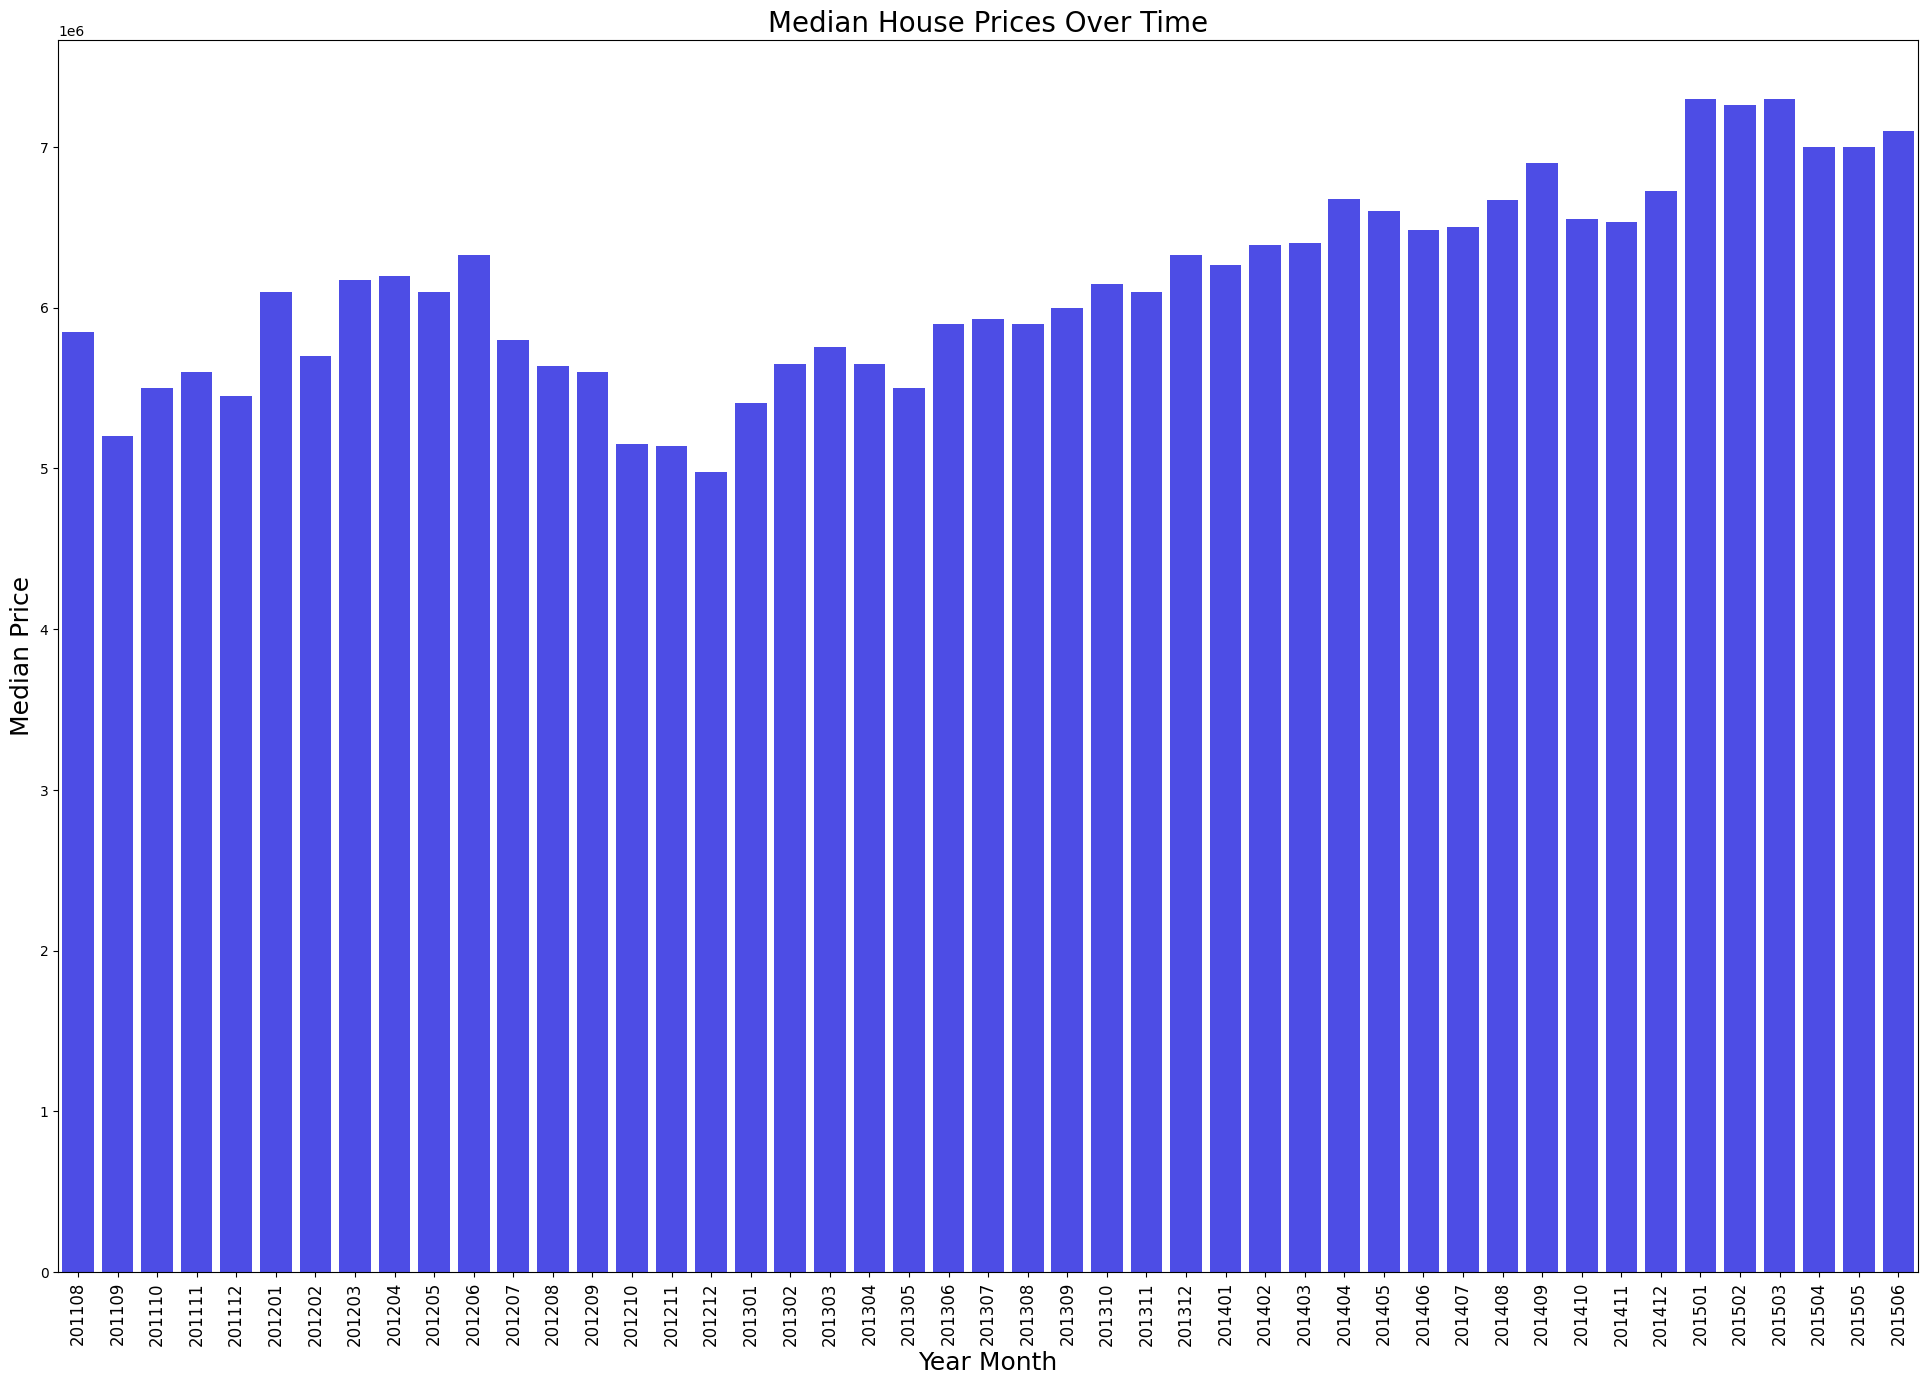

In [64]:
#Median House Price Over Years
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

train_df['yearmonth'] = train_df['timestamp'].map(lambda x: 100*x.year + x.month)

train_monthgrp = train_df.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(24, 16))
sns.barplot(x=train_monthgrp.yearmonth.values, y=train_monthgrp.price_doc.values, alpha=0.8, color="blue")  # Replace 'color[2]' with a color name or code
plt.ylabel('Median Price', fontsize=18)
plt.xlabel('Year Month', fontsize=18)
plt.xticks(rotation='vertical', fontsize=12)
plt.title('Median House Prices Over Time', fontsize=20)
plt.show()


In [65]:
##Correlations
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])


correlations = numeric_df.corr()['price_doc'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)

print(correlations)


price_doc                                     1.000000
log_price_doc                                 0.829761
num_room                                      0.476337
full_sq                                       0.341840
sport_count_5000                              0.294864
sport_count_3000                              0.290651
trc_count_5000                                0.289371
sport_count_2000                              0.278056
office_sqm_5000                               0.269977
trc_sqm_5000                                  0.268072
sport_count_1500                              0.258376
sport_objects_raion                           0.252794
trc_count_3000                                0.242068
cafe_count_5000_price_1000                    0.240464
cafe_count_5000_price_1500                    0.232612
cafe_count_5000                               0.231546
cafe_count_5000_na_price                      0.230055
cafe_count_5000_price_500                     0.226952
office_sqm

In [66]:
#Correlations
distance_features = [
    'cafe_count_500', 'cafe_count_1000', 'cafe_count_1500',
    'cafe_count_2000', 'cafe_count_3000', 'cafe_count_5000'
]

count_by_price_features = [
    'cafe_count_500_price_500', 'cafe_count_500_price_1000', 'cafe_count_500_price_1500',
    'cafe_count_500_price_2500', 'cafe_count_500_price_4000', 'cafe_count_500_price_high',
    'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500',
    'cafe_count_1000_price_2500', 'cafe_count_1000_price_high', 'cafe_count_1000_price_4000',
    'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500',
    'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'cafe_count_1500_price_high',
    'cafe_count_2000_price_500', 'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500',
    'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high',
    'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500',
    'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000', 'cafe_count_3000_price_high',
    'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500',
    'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high'
]

price_statistics_features = [
    'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
    'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
    'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
    'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
    'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000'
]

na_price_features = [
    'cafe_count_1000_na_price', 'cafe_count_1500_na_price',
    'cafe_count_2000_na_price', 'cafe_count_3000_na_price',
    'cafe_count_5000_na_price', 'cafe_count_500_na_price',
    'cafe_count_5000_na_price'
]


infrastructure_group= [
        'nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
        'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km',
        'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk',
        'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km'
    ]



sport_columns = [
    'sport_objects_raion',
    'fitness_km',
    'swim_pool_km',
    'ice_rink_km',
    'water_treatment_km',
    'water_km',
    'stadium_km',
    'basketball_km',
    'leisure_count_500',
    'leisure_count_1000',
    'sport_objects_raion',
    'park_km',
    'big_church_km',
    'church_synagogue_km',
    'mosque_km',
    'theater_km',
    'museum_km',
    'exhibition_km',
    'catering_km',
    'leisure_count_500',
    'sport_count_500',
    'sport_count_1000'
]

green_zone_features = [
    'green_zone_part', 'green_zone_km', 'green_part_500', 'green_part_1000',
    'green_part_1500', 'green_part_2000', 'green_part_3000', 'green_part_5000'
]

transportation = [
          "raion_build_count_with_material_info",
    "metro_min_avto",
    "metro_km_avto",
    "metro_min_walk",
    "metro_km_walk",
    "big_road1_km",
    "big_road2_km",
    "railroad_km",
    "zd_vokzaly_avto_km",
    "bus_terminal_avto_km"
    ]

offices_features = [
    "office_count_500", "office_sqm_500",
    "office_count_1000", "office_sqm_1000",
    "office_count_1500", "office_sqm_1500",
    "office_count_2000", "office_sqm_2000",
    "office_count_3000", "office_sqm_3000",
    "office_count_5000", "office_sqm_5000",
]


trc_features = [
    "trc_count_500", "trc_sqm_500",
    "trc_count_1000", "trc_sqm_1000",
    "trc_count_1500", "trc_sqm_1500",
    "trc_count_2000", "trc_sqm_2000",
    "trc_count_3000", "trc_sqm_3000",
    "trc_count_5000", "trc_sqm_5000",
]



church_mosque_features = [
    "big_church_count_500", "church_count_500", "mosque_count_500",
    "big_church_count_1000", "church_count_1000", "mosque_count_1000",
    "big_church_count_1500", "church_count_1500", "mosque_count_1500",
    "big_church_count_2000", "church_count_2000", "mosque_count_2000",
    "big_church_count_3000", "church_count_3000", "mosque_count_3000",
    "big_church_count_5000", "church_count_5000", "mosque_count_5000",
]


leisure_sport_features = [

    "leisure_count_500",
    "leisure_count_1500",
    "leisure_count_2000",
    "leisure_count_3000",
    "leisure_count_5000",

    "sport_count_1000",
    "sport_count_1500",
    "sport_count_2000",
    "sport_count_3000",
    "sport_count_5000",
]

market_features = [
    "market_count_500",
    "market_count_1000",
    "market_count_1500",
    "market_count_2000",
    "market_count_3000",
    "market_count_5000",
]


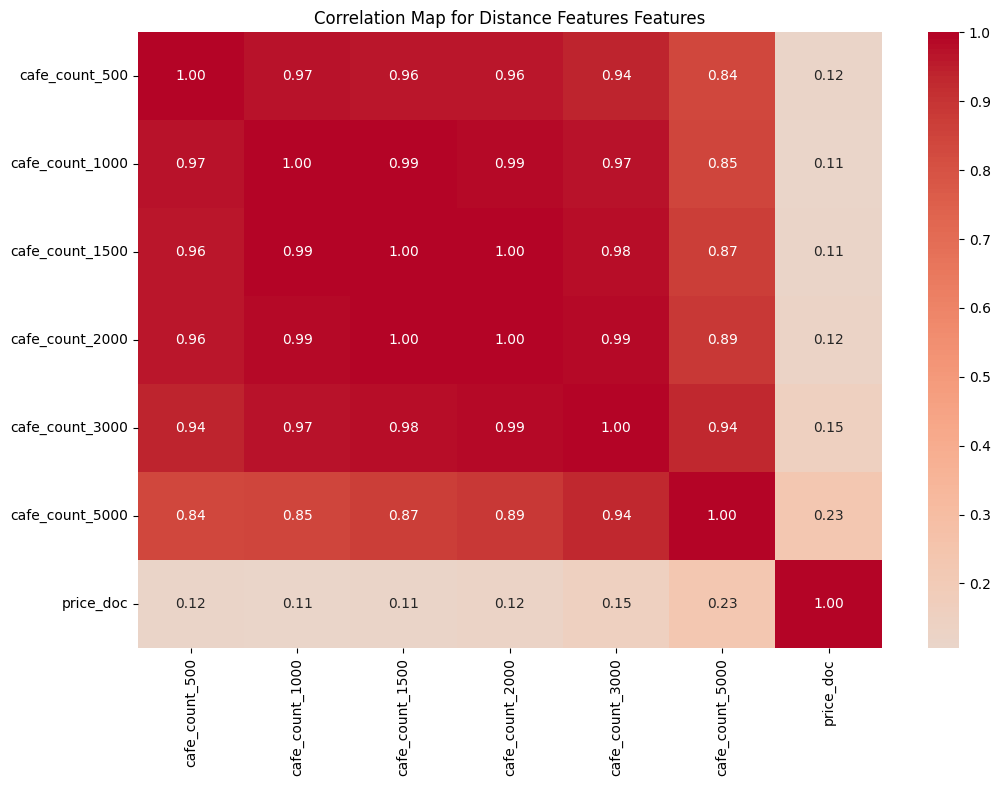

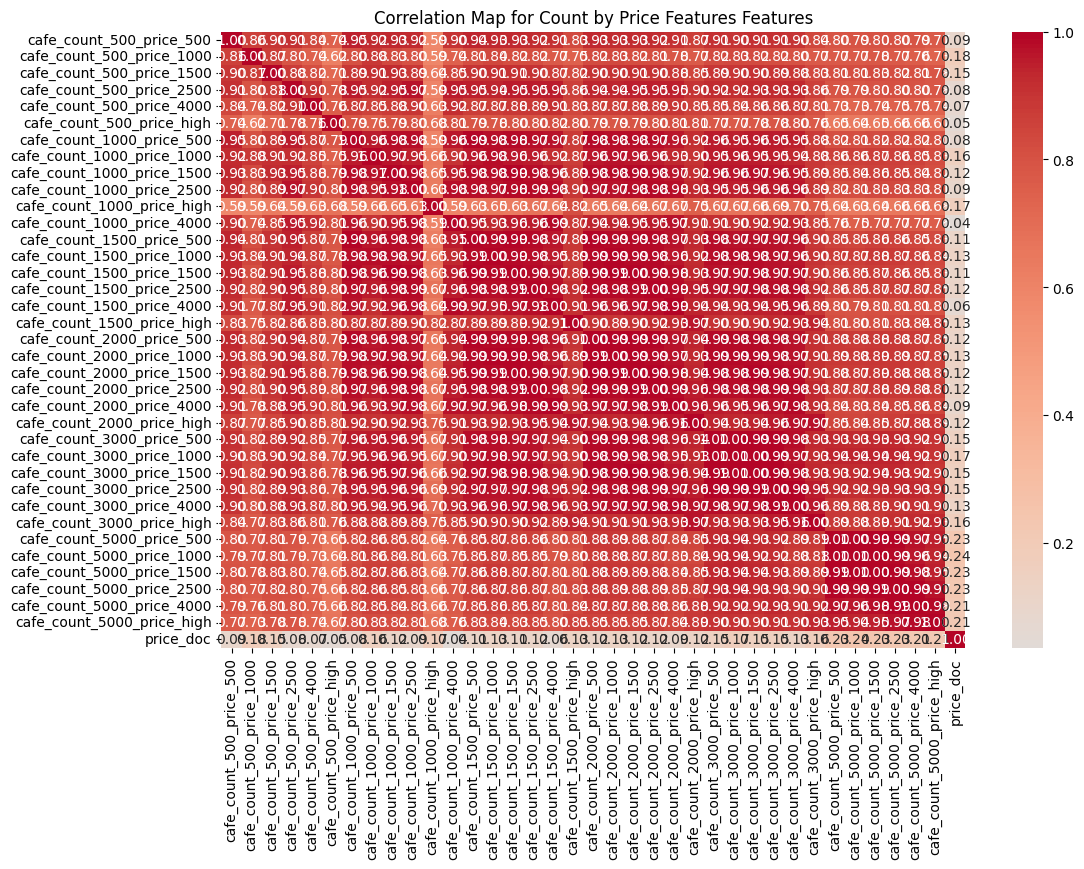

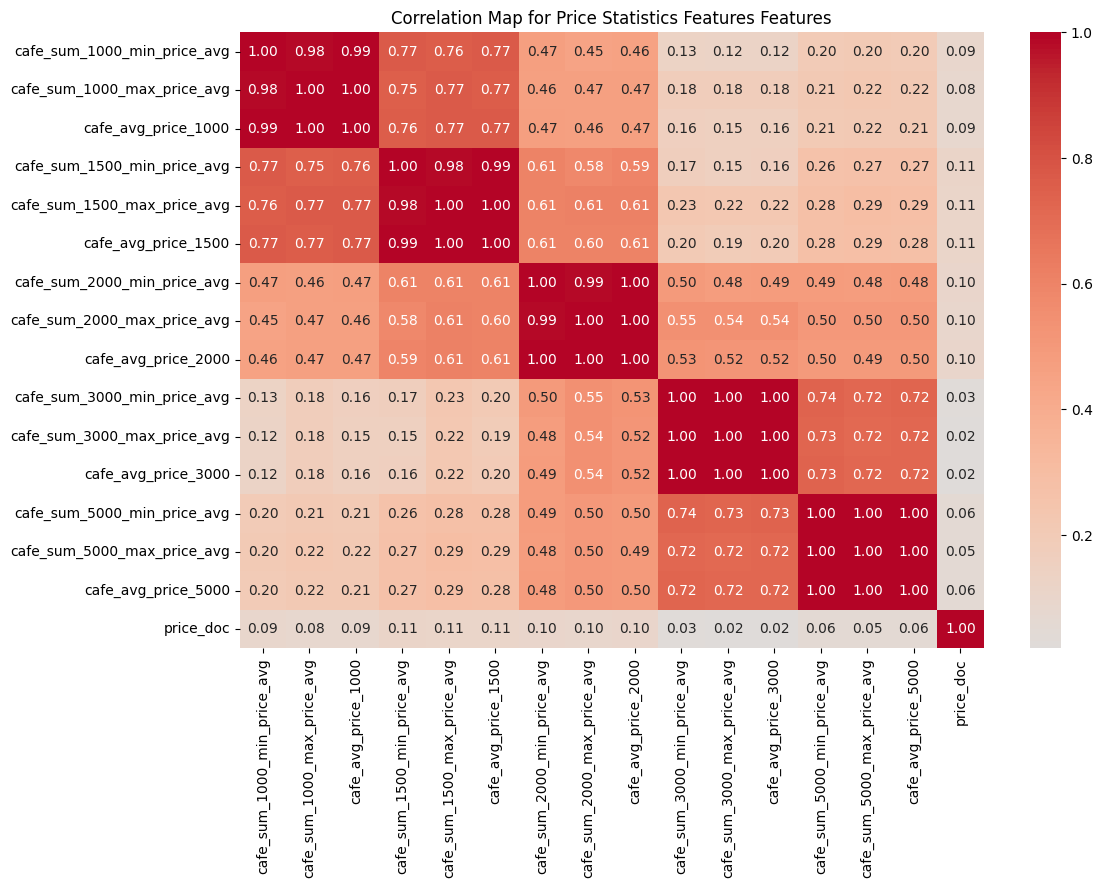

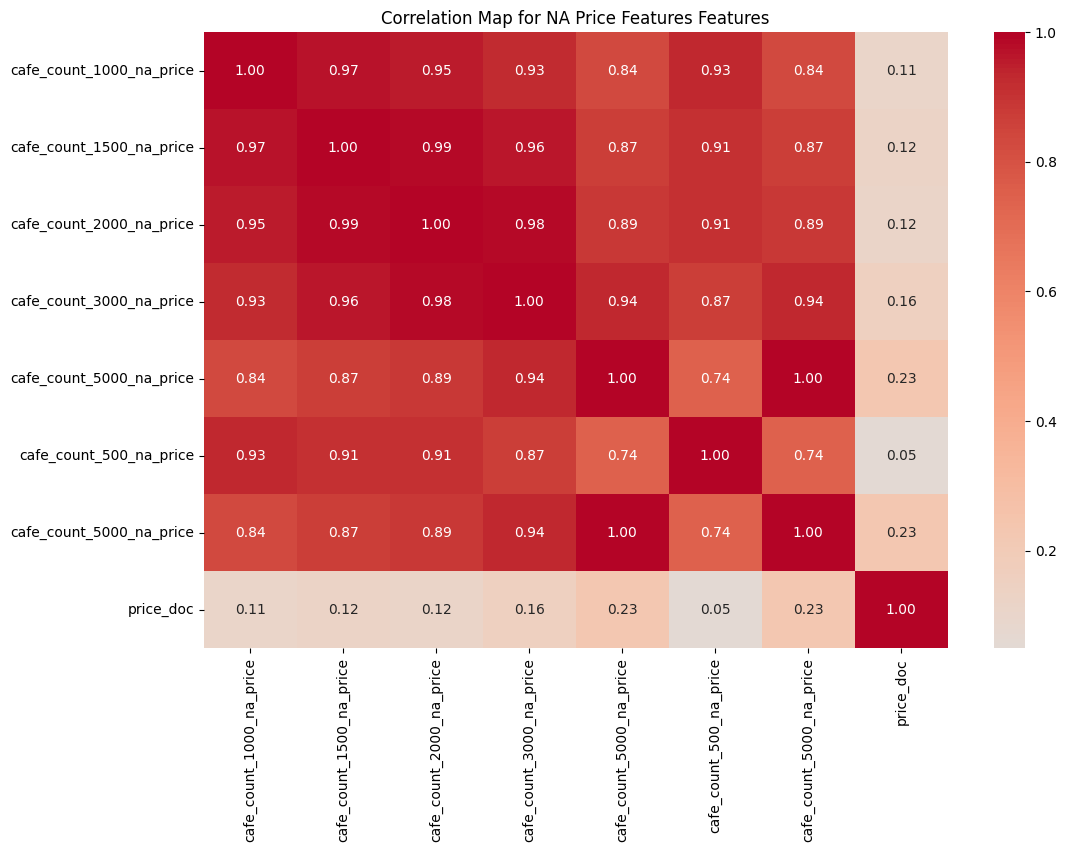

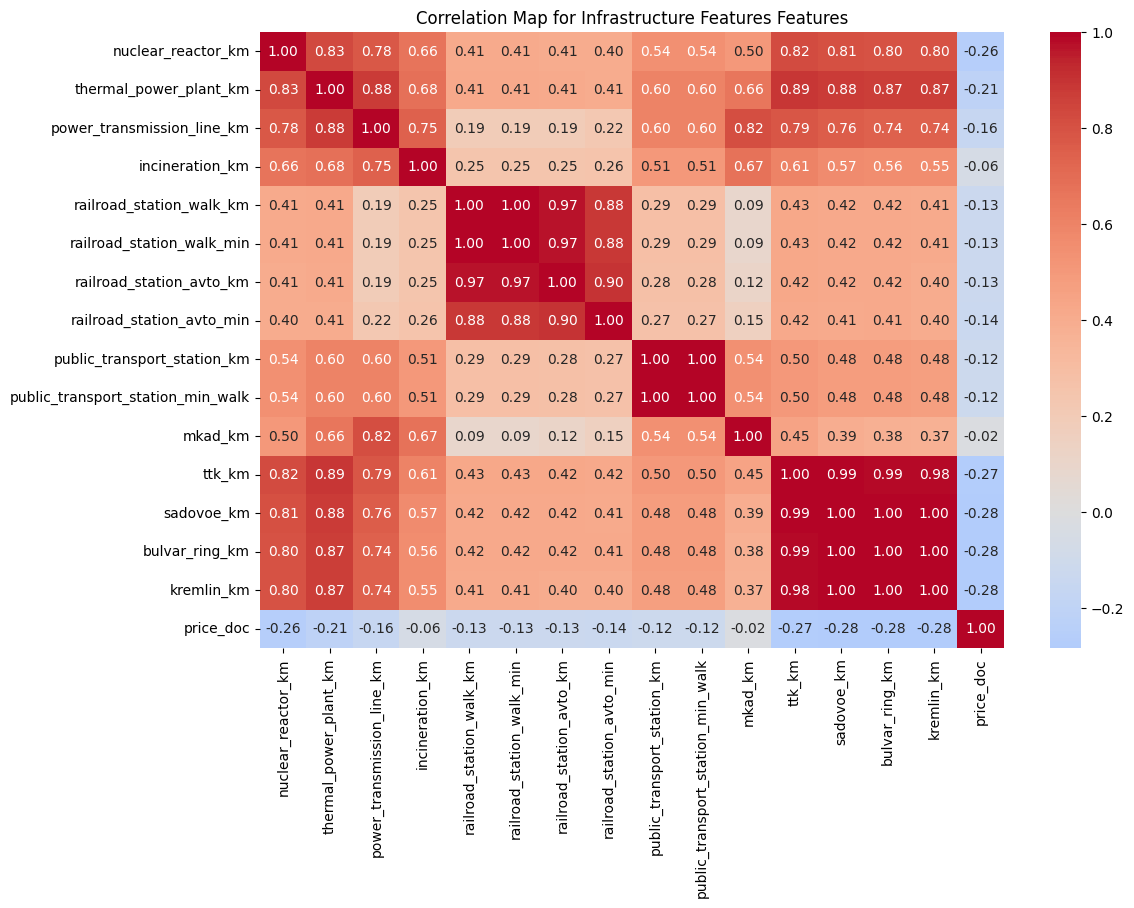

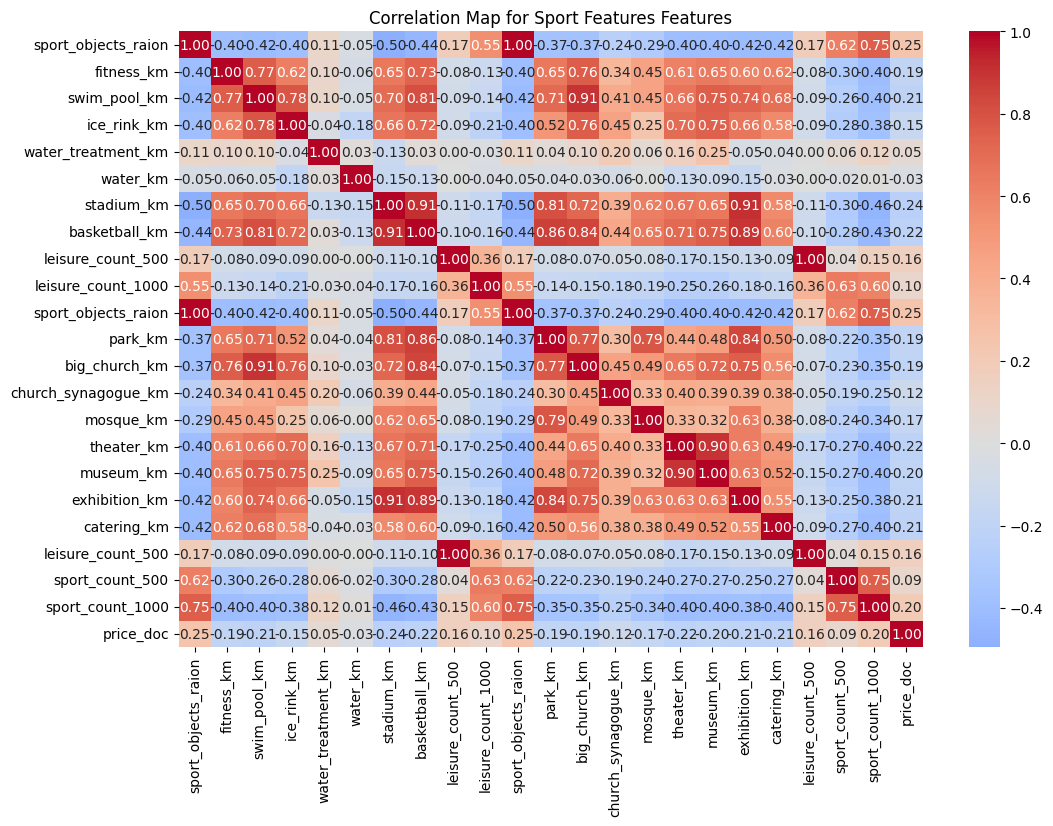

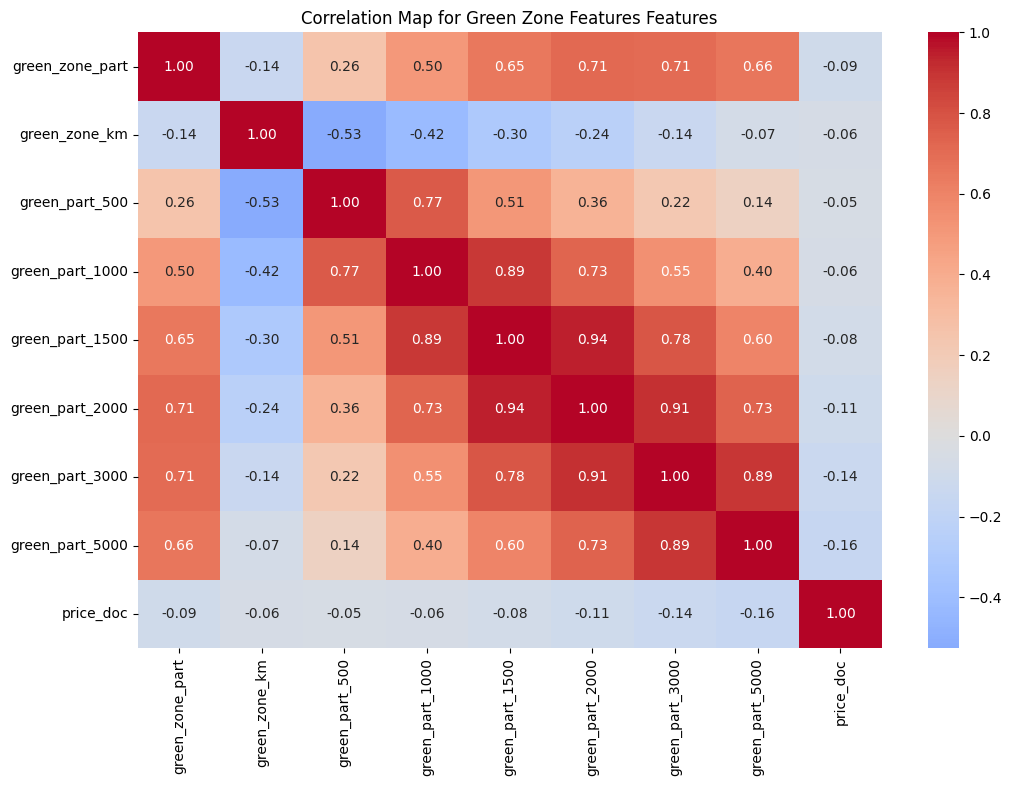

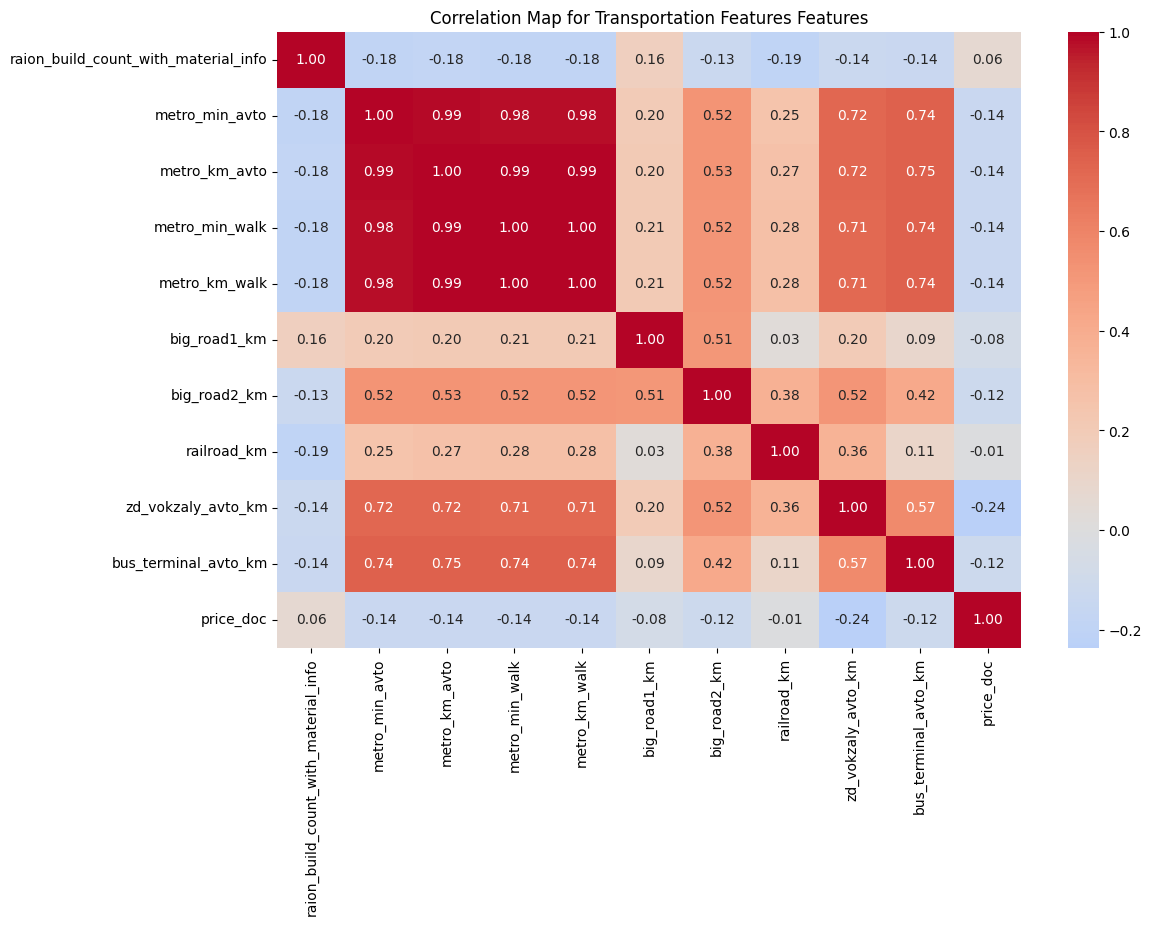

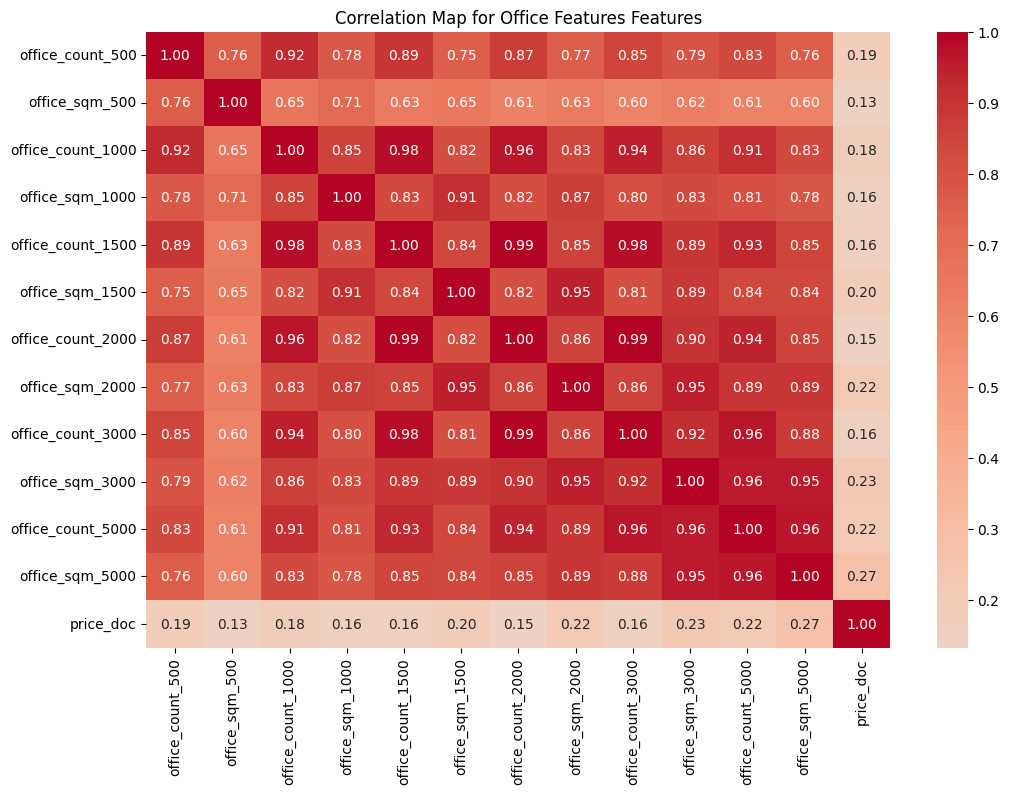

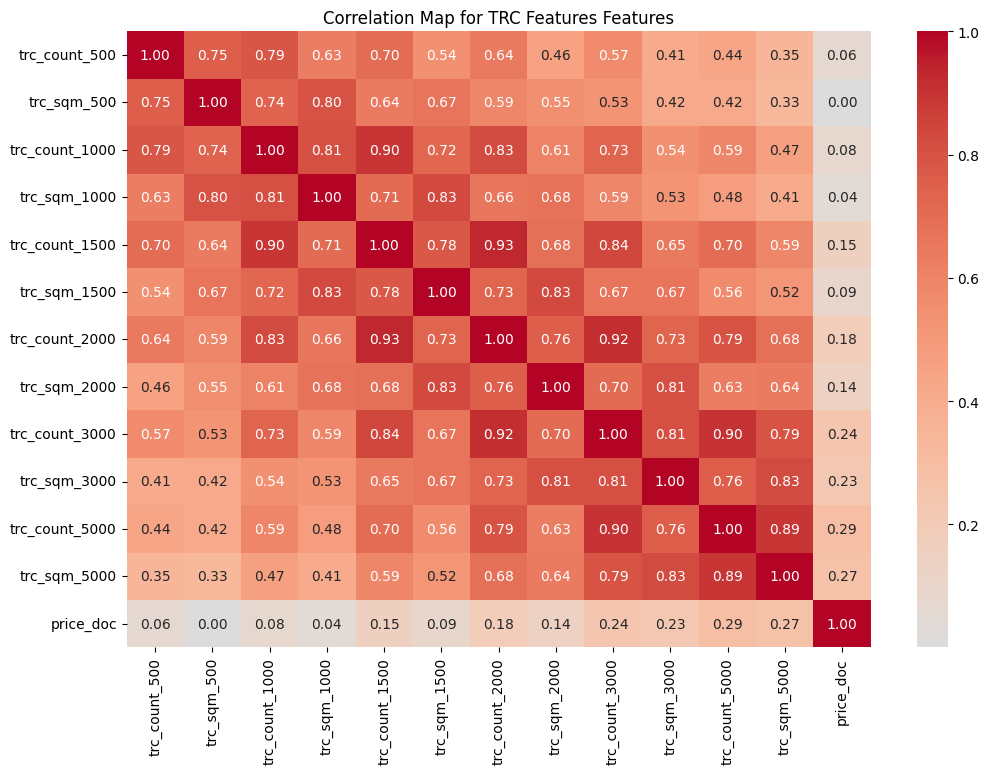

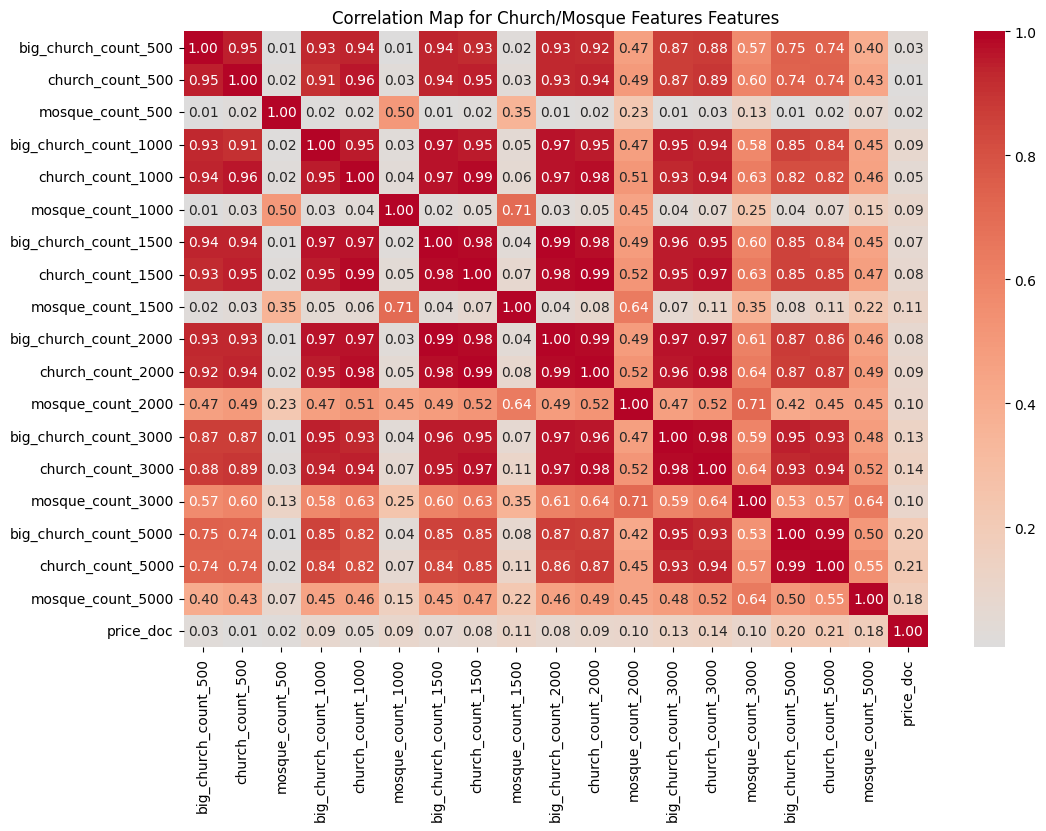

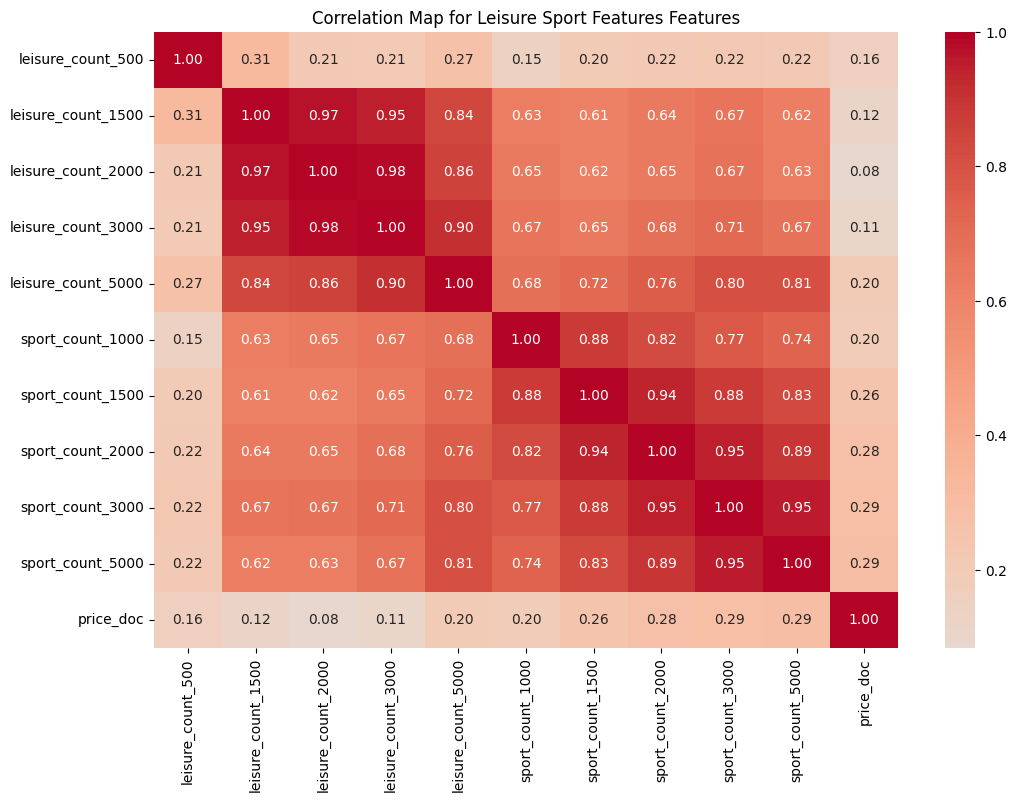

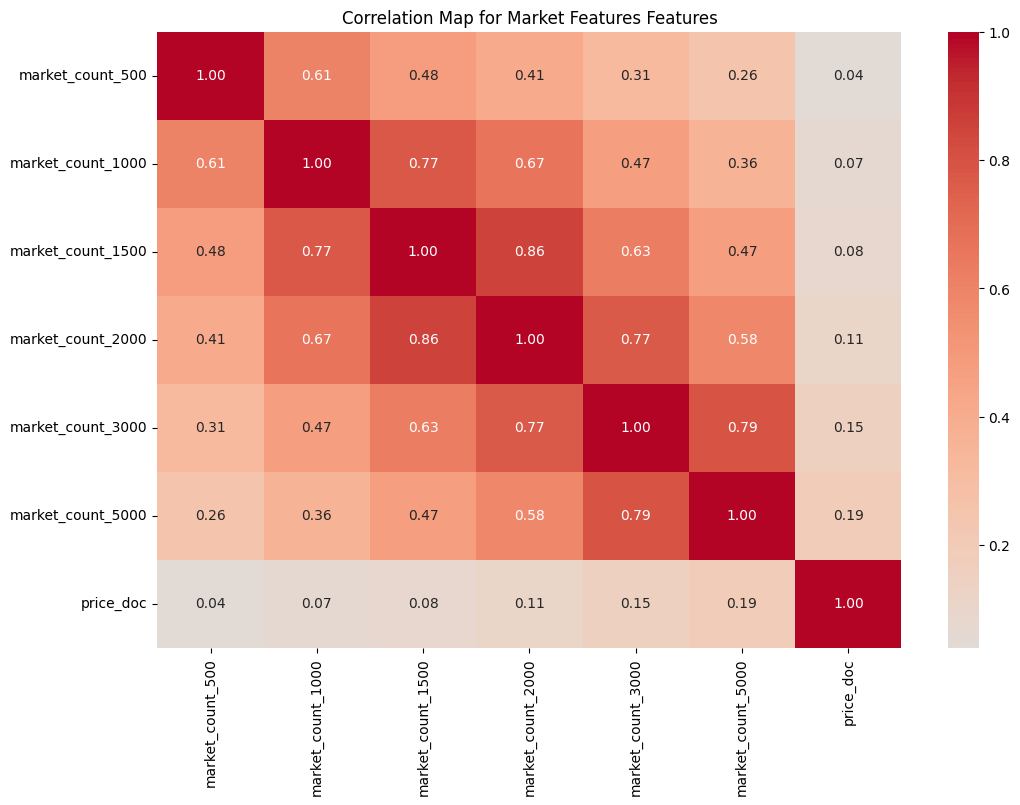

In [67]:
#Plotting Corr
def plot_correlation_map(data, target_column, group_name):
    correlation_data = data.copy()
    correlation_data[target_column] = train_df[target_column]

    correlation_matrix = correlation_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title(f'Correlation Map for {group_name} Features')
    plt.show()

feature_groups = {
    "Distance Features": distance_features,
    "Count by Price Features": count_by_price_features,
    "Price Statistics Features": price_statistics_features,
    "NA Price Features": na_price_features,
    "Infrastructure Features": infrastructure_group,
    "Sport Features": sport_columns,
    "Green Zone Features": green_zone_features,
    "Transportation Features": transportation,
    "Office Features": offices_features,
    "TRC Features": trc_features,
    "Church/Mosque Features": church_mosque_features,
    "Leisure Sport Features": leisure_sport_features,
    "Market Features": market_features,
}

for group_name, features in feature_groups.items():
    relevant_data = train_df[features].dropna()
    plot_correlation_map(relevant_data, 'price_doc', group_name)


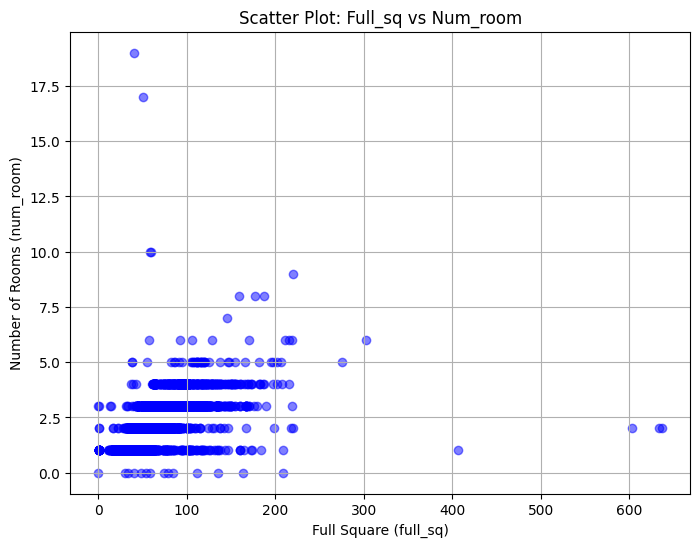

In [68]:
#Full_sq vs num_rooms
plt.figure(figsize=(8, 6))
plt.scatter(train_df['full_sq'], train_df['num_room'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Full_sq vs Num_room')
plt.xlabel('Full Square (full_sq)')
plt.ylabel('Number of Rooms (num_room)')
plt.grid(True)
plt.show()

In [69]:

min = train_df['full_sq'].min()
max = train_df['full_sq'].max()
mean = train_df['full_sq'].mean()
median = train_df['full_sq'].median()
std = train_df['full_sq'].std()

print("Minimum:", min)
print("Maximum:", max)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)


Minimum: 0
Maximum: 5326
Mean: 54.21426930524105
Median: 49.0
Standard Deviation: 38.031487324106465


In [70]:
# Calculate descriptive statistics by product_type
grouped_stats = train_df.groupby('product_type')['price_doc'].describe()
print(grouped_stats)


                 count          mean           std       min        25%  \
product_type                                                              
Investment     19448.0  7.495294e+06  5.054911e+06  100000.0  5200000.0   
OwnerOccupier  11023.0  6.466255e+06  4.172181e+06  301693.0  4275853.5   

                     50%        75%          max  
product_type                                      
Investment     6670000.0  8850000.0  111111112.0  
OwnerOccupier  5564090.0  7162480.0   71249624.0  


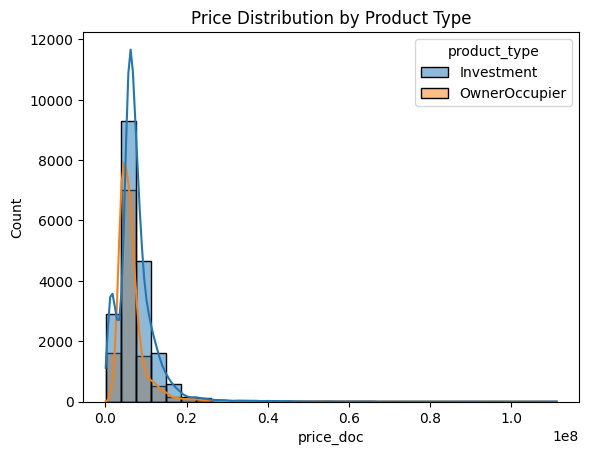

In [71]:
# Plot histograms for price_doc by product_type
sns.histplot(data=train_df, x='price_doc', hue='product_type', kde=True, bins=30)
plt.title('Price Distribution by Product Type')
plt.show()


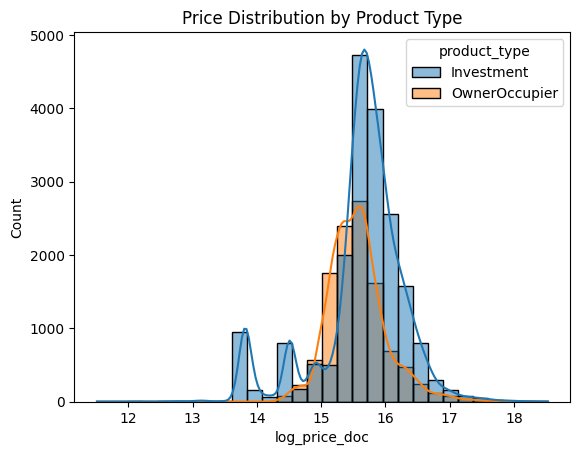

In [72]:
# Plot histograms for log price_doc by product_type
sns.histplot(data=train_df, x='log_price_doc', hue='product_type', kde=True, bins=30)
plt.title('Price Distribution by Product Type')
plt.show()


In [73]:
#Variances
pd.options.display.float_format = '{:.4f}'.format

numeric_columns = train_df.select_dtypes(include=['number'])

column_variances = numeric_columns.var()

sorted_variances = column_variances.sort_values()

print("Column variances (sorted in ascending order):")
print(sorted_variances)




Column variances (sorted in ascending order):
provision_retail_space_modern_sqm                          0.0000
unemployment                                               0.0000
seats_theather_rfmin_per_100000_cap                        0.0000
employment                                                 0.0001
gdp_annual_growth                                          0.0002
old_house_share                                            0.0003
deposits_growth                                            0.0003
share_own_revenues                                         0.0003
grp_growth                                                 0.0004
profitable_enterpr_share                                   0.0006
unprofitable_enterpr_share                                 0.0006
salary_growth                                              0.0007
real_dispos_income_per_cap_growth                          0.0033
divorce_rate                                               0.0048
mosque_count_500              

#Feature Engineering **train_df**

## Making corrections to the data

In [74]:
#Handaling with outliars and feature engenering

# Clean data in train_df
def clean_data(train_df):
    # Replace life_sq > full_sq with NaN
    bad_index = train_df[train_df.life_sq > train_df.full_sq].index
    train_df.loc[bad_index, "life_sq"] = np.NaN

    # Replace life_sq < 5 with NaN
    bad_index = train_df[train_df.life_sq < 5].index
    train_df.loc[bad_index, "life_sq"] = np.NaN

    # Replace full_sq < 5 with NaN
    bad_index = train_df[train_df.full_sq < 5].index
    train_df.loc[bad_index, "full_sq"] = np.NaN

    # Handle kitch_sq >= life_sq
    bad_index = train_df[train_df.kitch_sq >= train_df.life_sq].index
    train_df.loc[bad_index, "kitch_sq"] = np.NaN

    # Handle kitch_sq being 0 or 1
    bad_index = train_df[(train_df.kitch_sq == 0) | (train_df.kitch_sq == 1)].index
    train_df.loc[bad_index, "kitch_sq"] = np.NaN

    # Handle build_year < 1500
    bad_index = train_df[train_df.build_year < 1500].index
    train_df.loc[bad_index, "build_year"] = np.NaN

    # Handle num_room == 0
    bad_index = train_df[train_df.num_room == 0].index
    train_df.loc[bad_index, "num_room"] = np.NaN

    # Handle state == 33
    bad_index = train_df[train_df.state == 33].index
    train_df.loc[bad_index, "state"] = np.NaN

    # Remove extreme price per square meter
    train_df.loc[train_df.full_sq == 0, 'full_sq'] = 50
    train_df = train_df[(train_df.price_doc / train_df.full_sq <= 600000) &
                        (train_df.price_doc / train_df.full_sq >= 10000)]

    return train_df


# Feature engineering for train_df
def feature_engineering(train_df):
    # Convert timestamp to datetime if it's not already
    if not np.issubdtype(train_df['timestamp'].dtype, np.datetime64):
        train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

    # Add month and day-of-week
    train_df['month'] = train_df['timestamp'].dt.month
    train_df['dow'] = train_df['timestamp'].dt.dayofweek

    # Relative floor and kitchen square
    train_df['rel_kitch_sq'] = train_df['kitch_sq'] / train_df['full_sq'].astype(float)

    # Room size
    train_df['room_size'] = train_df['life_sq'] / train_df['num_room'].astype(float)

    return train_df


# Process train_df
train_df = clean_data(train_df)
train_df = feature_engineering(train_df)

print("Processed train_df shape:", train_df.shape)
train_df.head()


Processed train_df shape: (30402, 397)


<ipython-input-74-8f8c8a5dbf04>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['month'] = train_df['timestamp'].dt.month
<ipython-input-74-8f8c8a5dbf04>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['dow'] = train_df['timestamp'].dt.dayofweek
<ipython-input-74-8f8c8a5dbf04>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

id  timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1 2011-08-20  43.0000  27.0000 4.0000        NaN       NaN         NaN   
1   2 2011-08-23  34.0000  19.0000 3.0000        NaN       NaN         NaN   
2   3 2011-08-27  43.0000  29.0000 2.0000        NaN       NaN         NaN   
3   4 2011-09-01  89.0000  50.0000 9.0000        NaN       NaN         NaN   
4   5 2011-09-05  77.0000  77.0000 4.0000        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6407578.1000   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9589336.9120   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4808269.8310   
3       NaN       NaN    NaN   Investment             Mitino 12583535.6900   
4       NaN       NaN    NaN   Investment          Basmannoe  8398460.6220   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572           0.1897       0.0001                9576   
1       115352           0.3726       0.0496                6880   
2       101708           0.1126       0.1185                5879   
3       178473           0.1947       0.0698               13087   
4       108171           0.0152       0.0373                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0        5001.0000                                  5            10309   
1        3119.0000                                  5             7759   
2        1463.0000                                  4             6207   
3        6839.0000                                  9            13670   
4        3240.0000                                  7             6748   

   school_quota  school_education_centers_raion  \
0    11065.0000                               5   
1     6237.0000                               8   
2     5580.0000                               7   
3    17063.0000                              10   
4     7770.0000                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0             240.0000   
1                                      0             229.0000   
2                                      0            1183.0000   
3                                      0                  NaN   
4                                      0             562.0000   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no                  

In [75]:
# Count the number of zeros in each "_km" column
km_columns = [col for col in train_df.columns if '_km' in col]

zero_counts = {col: (train_df[col] == 0).sum() for col in km_columns}

zero_counts_df = pd.DataFrame(list(zero_counts.items()), columns=['Column', 'Zero_Count'])
print(zero_counts_df)

                         Column  Zero_Count
0                 metro_km_avto           1
1                 metro_km_walk           1
2               kindergarten_km           0
3                     school_km          45
4                       park_km           0
5                 green_zone_km         721
6                 industrial_km         672
7            water_treatment_km           0
8                   cemetery_km          10
9               incineration_km           0
10     railroad_station_walk_km           0
11     railroad_station_avto_km           0
12  public_transport_station_km           0
13                     water_km           0
14                      mkad_km           0
15                       ttk_km           0
16                   sadovoe_km           0
17               bulvar_ring_km           0
18                   kremlin_km           0
19                 big_road1_km           0
20                 big_road2_km           0
21                  railroad_km 

In [76]:
# Replace 0 values with NaN for all _km columns
km_columns = [col for col in train_df.columns if '_km' in col]
train_df[km_columns] = train_df[km_columns].replace(0, pd.NA)


##Outliers

In [77]:
#Handaling with outliars

n_remove = 1900

low_percentile = n_remove / len(train_df) / 2
high_percentile = 1 - low_percentile

low_cutoff = train_df['price_doc'].quantile(low_percentile)
high_cutoff = train_df['price_doc'].quantile(high_percentile)

filtered_df = train_df[(train_df['price_doc'] >= low_cutoff) & (train_df['price_doc'] <= high_cutoff)]

print(f"Original dataset size: {len(train_df)}")
print(f"Filtered dataset size: {len(filtered_df)}")

filtered_df.to_csv('filtered_train_df.csv', index=False)
print("Filtered dataset saved as 'filtered_train_df.csv'.")
train_df = filtered_df


Original dataset size: 30402
Filtered dataset size: 28509
Filtered dataset saved as 'filtered_train_df.csv'.


##Deleting columns

In [78]:
#Uselss columns based on logic
useless_ids = ["ID_railroad_station_avto", "ID_big_road1", "ID_big_road2",
			   "ID_railroad_terminal", "ID_bus_terminal"]

print(f"shape before drop:{train_df.shape}")
train_df = train_df.drop(columns= useless_ids, axis=1)
print(f"shape after drop:{train_df.shape}")

shape before drop:(28509, 397)
shape after drop:(28509, 392)


In [79]:
# List of columns to drop based on high number of missing valeus, low correlation and health logic
useless_ids = [
    "max_floor", "material", "preschool_quota", "school_quota",
    "hospital_beds_raion", "raion_build_count_with_material_info", "raion_build_count_with_builddate_info",
    "cafe_sum_500_min_price_avg", "cafe_sum_500_max_price_avg", "cafe_avg_price_500",
    "cafe_sum_1000_min_price_avg", "cafe_sum_1000_max_price_avg", "cafe_avg_price_1000",
    "cafe_sum_1500_min_price_avg", "cafe_sum_1500_max_price_avg", "cafe_sum_2000_min_price_avg", "cafe_sum_2000_max_price_avg"
]

print(f"Shape before drop: {train_df.shape}")
train_df = train_df.drop(columns=useless_ids, axis=1)
print(f"Shape after drop: {train_df.shape}")


Shape before drop: (28509, 392)
Shape after drop: (28509, 375)


In [80]:
# List of columns to drop based on low variance, low correlation and health logic
useless_ids = [
    "mosque_count_500","mosque_count_1000"
]

print(f"Shape before drop: {train_df.shape}")
train_df = train_df.drop(columns=useless_ids, axis=1)
print(f"Shape after drop: {train_df.shape}")

Shape before drop: (28509, 375)
Shape after drop: (28509, 373)


In [81]:
# Count mismatched rows where the difference is 1000 or above
train_df['population_diff'] = abs(train_df['full_all'] - (train_df['male_f'] + train_df['female_f']))
large_mismatch_count = len(train_df[(train_df['population_diff'] >= 1) & train_df['population_diff'].notnull()])
print(f"Number of rows with a population mismatch of 1 or more: {large_mismatch_count}")

Number of rows with a population mismatch of 1 or more: 5315


In [82]:
# Drop the 'full_all' column
train_df = train_df.drop('full_all', axis=1)
train_df = train_df.drop('population_diff', axis=1)

print("The 'full_all' column has been deleted.")


The 'full_all' column has been deleted.


In [83]:
# Drop the 'sub_area' column
train_df = train_df.drop('sub_area', axis=1)

print("The 'sub_area' column has been deleted.")

The 'sub_area' column has been deleted.


In [84]:
# columns to delete
columns_to_delete = [
    'grp', 'grp_growth', 'real_dispos_income_per_cap_growth', 'profitable_enterpr_share',
    'unprofitable_enterpr_share', 'share_own_revenues', 'overdue_wages_per_cap',
    'fin_res_per_cap', 'marriages_per_1000_cap', 'divorce_rate', 'construction_value',
    'invest_fixed_assets_phys', 'pop_migration', 'pop_total_inc', 'housing_fund_sqm',
    'lodging_sqm_per_cap', 'water_pipes_share', 'baths_share', 'sewerage_share', 'gas_share',
    'hot_water_share', 'electric_stove_share', 'heating_share', 'old_house_share',
    'infant_mortarity_per_1000_cap', 'perinatal_mort_per_1000_cap', 'incidence_population',
    'load_of_teachers_preschool_per_teacher', 'child_on_acc_pre_school', 'modern_education_share',
    'old_education_build_share', 'provision_doctors', 'power_clinics', 'hospital_beds_available_per_cap',
    'hospital_bed_occupancy_per_year', 'provision_retail_space_sqm', 'provision_retail_space_modern_sqm',
    'theaters_viewers_per_1000_cap', 'museum_visitis_per_100_cap', 'population_reg_sports_share',
    'students_reg_sports_share', 'apartment_build'
]

train_df = train_df.drop(columns=columns_to_delete, errors='ignore')
print("Columns removed and cleaned dataset saved successfully.")


Columns removed and cleaned dataset saved successfully.


##Categorial to numeric

In [85]:
ecology_mapping = {
    'poor': 1,
    'no data': 2,
    'good': 3,
    'excellent': 4,
    'satisfactory': 5
}

train_df['ecology'] = train_df['ecology'].map(ecology_mapping)

print(train_df['ecology'])

0        3
1        4
2        1
3        3
4        4
5        1
6        1
7        3
8        1
9        5
10       3
11       5
12       5
13       1
14       1
15       4
16       1
17       1
18       3
19       3
20       2
21       1
22       5
23       1
24       5
25       5
26       3
27       3
28       1
29       3
30       3
32       3
33       4
34       2
35       4
36       4
37       1
38       1
39       1
40       4
41       4
42       1
43       5
44       4
45       3
46       3
47       3
48       3
49       1
51       3
52       1
53       4
54       4
55       1
56       1
57       5
58       1
60       3
61       3
62       1
63       1
64       4
65       3
67       4
68       1
69       1
70       3
71       5
72       4
73       1
74       4
75       1
76       1
77       1
78       3
84       3
85       3
87       2
88       5
89       5
90       5
91       5
93       3
94       1
95       4
97       4
98       3
100      1
101      1
102      3
103      3

In [86]:
train_df['product_type_investment'] = np.where(train_df['product_type'] == 'Investment', 1, 0)
train_df.drop('product_type', axis=1, inplace=True)
print(train_df['product_type_investment'].head())

0    1
1    1
2    1
3    1
4    1
Name: product_type_investment, dtype: int64


##Binary to numeric

In [87]:
# Identify binary columns (columns with exactly two unique values)
binary_columns = [col for col in train_df.columns if train_df[col].nunique() == 2]

# Map all binary columns to 1/0
for col in binary_columns:
    unique_values = train_df[col].unique()
    train_df[col] = train_df[col].map({unique_values[0]: 0, unique_values[1]: 1})

print("Binary columns transformed to 1/0:")
print(binary_columns)

Binary columns transformed to 1/0:
['culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'mosque_count_1500', 'mosque_count_2000', 'product_type_investment']


##fill missing valus with avg

In [88]:

# fill missing values
columns_to_fill = [
    "metro_min_walk",
    "metro_km_walk",
    "railroad_station_walk_km",
    "railroad_station_walk_min",
    "ID_railroad_station_walk",
    "cafe_avg_price_1500",
    "cafe_avg_price_2000",
    "cafe_sum_3000_min_price_avg",
    "cafe_sum_3000_max_price_avg",
    "cafe_avg_price_3000",
    "prom_part_5000",
    "cafe_sum_5000_min_price_avg",
    "cafe_sum_5000_max_price_avg",
    "cafe_avg_price_5000",
    "floor"
]

# Fill missing values with the average value from train_df
for column in columns_to_fill:
    if column in train_df.columns:
        avg_value = train_df[column].mean()
        train_df[column].fillna(avg_value, inplace=True)


<ipython-input-88-2afb31723c12>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(avg_value, inplace=True)
<ipython-input-88-2afb31723c12>:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[column].fillna(avg_value, inplace=True)


In [89]:
# fill missing values
columns_to_fill = [
    "build_count_block",
    "build_count_wood",
    "build_count_frame",
    "build_count_brick",
    "build_count_monolith",
    "build_count_panel",
    "build_count_foam",
    "build_count_slag",
    "build_count_mix",
    "build_count_before_1920",
    "build_count_1921-1945",
    "build_count_1946-1970",
    "build_count_1971-1995",
    "build_count_after_1995"
]

# Fill missing values with the average value from train_df
for column in columns_to_fill:
    if column in train_df.columns:
        avg_value = train_df[column].mean()
        train_df[column].fillna(avg_value, inplace=True)


<ipython-input-89-a31d04bf550f>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(avg_value, inplace=True)


In [90]:
# fill missing values
columns_to_fill = [
    'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'school_km',
    'green_zone_km', 'industrial_km', 'cemetery_km', 'railroad_station_walk_km',
    'railroad_station_walk_min', 'ID_railroad_station_walk', 'ts_km',
    'fitness_km', 'swim_pool_km', 'ice_rink_km', 'public_healthcare_km',
    'workplaces_km', 'shopping_centers_km', 'office_km',
    'additional_education_km', 'preschool_km', 'church_synagogue_km',
    'cafe_avg_price_1500', 'cafe_avg_price_2000', 'cafe_sum_3000_min_price_avg',
    'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'prom_part_5000',
    'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
    'cafe_avg_price_5000', 'floor'
]

# Fill missing values in the specified columns with the column average
for column in columns_to_fill:
    if column in train_df.columns:
        train_df[column].fillna(train_df[column].mean(), inplace=True)

print(train_df[columns_to_fill].isnull().sum())

metro_km_avto                  0
metro_min_walk                 0
metro_km_walk                  0
school_km                      0
green_zone_km                  0
industrial_km                  0
cemetery_km                    0
railroad_station_walk_km       0
railroad_station_walk_min      0
ID_railroad_station_walk       0
ts_km                          0
fitness_km                     0
swim_pool_km                   0
ice_rink_km                    0
public_healthcare_km           0
workplaces_km                  0
shopping_centers_km            0
office_km                      0
additional_education_km        0
preschool_km                   0
church_synagogue_km            0
cafe_avg_price_1500            0
cafe_avg_price_2000            0
cafe_sum_3000_min_price_avg    0
cafe_sum_3000_max_price_avg    0
cafe_avg_price_3000            0
prom_part_5000                 0
cafe_sum_5000_min_price_avg    0
cafe_sum_5000_max_price_avg    0
cafe_avg_price_5000            0
floor     

<ipython-input-90-3e6d003c08c5>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mean(), inplace=True)
<ipython-input-90-3e6d003c08c5>:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[column].fillna(train_df[column].mean(), inplace=True)


##missing values column fill with KNN


In [91]:
#Filling Missing values with KNN(num_rooms)
columns_to_use = ['num_room', 'full_sq', 'floor', 'raion_popul', 'area_m']

impute_df = train_df[columns_to_use]
imputer = KNNImputer(n_neighbors=5, weights="distance", metric="nan_euclidean")
# Perform KNN Imputation
imputed_data = imputer.fit_transform(impute_df)

# Replace the 'num_room' column in the original dataset with the imputed values
train_df['num_room'] = imputed_data[:, 0]

print(train_df['num_room'].head())


0   1.7957
1   1.0000
2   2.0000
3   3.2227
4   3.0000
Name: num_room, dtype: float64


In [92]:
##Filling Missing values with KNN(State)

columns_to_use = ['state', 'full_sq', 'floor', 'raion_popul']

impute_df = train_df[columns_to_use].copy()

imputer = KNNImputer(n_neighbors=5, weights="distance", metric="nan_euclidean")

# Perform KNN imputation
imputed_data = imputer.fit_transform(impute_df)

imputed_data[:, 0] = np.clip(np.rint(imputed_data[:, 0]), 1, 4)

train_df['state'] = imputed_data[:, 0]

print(train_df['state'].head())
print(train_df['state'].isnull().sum())




0   2.0000
1   2.0000
2   2.0000
3   2.0000
4   3.0000
Name: state, dtype: float64
0


In [93]:
#Filling Missing values with KNN(life_sq)
life_sq_features = ['life_sq', 'full_sq', 'floor', 'raion_popul']

life_sq_df = train_df[life_sq_features].copy()

life_sq_imputer = KNNImputer(n_neighbors=5, weights="distance", metric="nan_euclidean")

# Perform KNN Imputation
life_sq_imputed = life_sq_imputer.fit_transform(life_sq_df)

# Replace the `life_sq` column in the original dataset with the imputed values
train_df['life_sq'] = life_sq_imputed[:, 0]

print(train_df['life_sq'].isnull().sum())
print(train_df['life_sq'].head())


0
0   27.0000
1   19.0000
2   29.0000
3   50.0000
4   77.0000
Name: life_sq, dtype: float64


In [94]:
#Filling Missing values with KNN(kitch_sq)

kitch_sq_features = ['kitch_sq', 'full_sq', 'floor', 'raion_popul']

kitch_sq_df = train_df[kitch_sq_features].copy()

kitch_sq_imputer = KNNImputer(n_neighbors=5, weights="distance", metric="nan_euclidean")

# Perform KNN Imputation
kitch_sq_imputed = kitch_sq_imputer.fit_transform(kitch_sq_df)

# Replace the `kitch_sq` column in the original dataset with the imputed values
train_df['kitch_sq'] = kitch_sq_imputed[:, 0]

print(train_df['kitch_sq'].isnull().sum())
print(train_df['kitch_sq'].head())


0
0    6.4086
1    7.7302
2    5.2000
3   10.8976
4    6.7707
Name: kitch_sq, dtype: float64


In [95]:
test_df.shape

(7662, 390)

#Feature Engineering **Test_df**


##Feature engenerring

In [96]:
test_df = feature_engineering(test_df)

##Deleting columns

In [97]:
#Uselss columns
useless_ids = ["ID_railroad_station_avto", "ID_big_road1", "ID_big_road2",
			   "ID_railroad_terminal", "ID_bus_terminal"]

print(f"shape before drop:{test_df.shape}")
test_df = test_df.drop(columns= useless_ids, axis=1)
print(f"shape after drop:{test_df.shape}")

shape before drop:(7662, 394)
shape after drop:(7662, 389)


In [98]:
# List of columns to drop based on high number of missing valeus, low correlation and health logic
useless_ids = [
    "max_floor", "material", "preschool_quota", "school_quota",
    "hospital_beds_raion", "raion_build_count_with_material_info", "raion_build_count_with_builddate_info",
    "cafe_sum_500_min_price_avg", "cafe_sum_500_max_price_avg", "cafe_avg_price_500",
    "cafe_sum_1000_min_price_avg", "cafe_sum_1000_max_price_avg", "cafe_avg_price_1000",
    "cafe_sum_1500_min_price_avg", "cafe_sum_1500_max_price_avg", "cafe_sum_2000_min_price_avg", "cafe_sum_2000_max_price_avg"
]

print(f"Shape before drop: {test_df.shape}")
test_df = test_df.drop(columns=useless_ids, axis=1)
print(f"Shape after drop: {test_df.shape}")

Shape before drop: (7662, 389)
Shape after drop: (7662, 372)


In [99]:
# List of columns to drop based on low variance, low correlation and health logic
useless_ids = [
    "mosque_count_500","mosque_count_1000"
]

print(f"Shape before drop: {test_df.shape}")
test_df = test_df.drop(columns=useless_ids, axis=1)
print(f"Shape after drop: {test_df.shape}")

Shape before drop: (7662, 372)
Shape after drop: (7662, 370)


In [100]:
# Drop the 'full_all' column
test_df = test_df.drop('full_all', axis=1)

print("The 'full_all' column has been deleted.")


The 'full_all' column has been deleted.


In [101]:
# Drop the 'sub_area' column
test_df = test_df.drop('sub_area', axis=1)

print("The 'sub_area' column has been deleted.")

The 'sub_area' column has been deleted.


In [102]:
# columns to delete
columns_to_delete = [
    'grp', 'grp_growth', 'real_dispos_income_per_cap_growth', 'profitable_enterpr_share',
    'unprofitable_enterpr_share', 'share_own_revenues', 'overdue_wages_per_cap',
    'fin_res_per_cap', 'marriages_per_1000_cap', 'divorce_rate', 'construction_value',
    'invest_fixed_assets_phys', 'pop_migration', 'pop_total_inc', 'housing_fund_sqm',
    'lodging_sqm_per_cap', 'water_pipes_share', 'baths_share', 'sewerage_share', 'gas_share',
    'hot_water_share', 'electric_stove_share', 'heating_share', 'old_house_share',
    'infant_mortarity_per_1000_cap', 'perinatal_mort_per_1000_cap', 'incidence_population',
    'load_of_teachers_preschool_per_teacher', 'child_on_acc_pre_school', 'modern_education_share',
    'old_education_build_share', 'provision_doctors', 'power_clinics', 'hospital_beds_available_per_cap',
    'hospital_bed_occupancy_per_year', 'provision_retail_space_sqm', 'provision_retail_space_modern_sqm',
    'theaters_viewers_per_1000_cap', 'museum_visitis_per_100_cap', 'population_reg_sports_share',
    'students_reg_sports_share', 'apartment_build'
]

# Drop the columns
test_df = test_df.drop(columns=columns_to_delete, errors='ignore')

print("Columns removed and cleaned dataset saved successfully.")


Columns removed and cleaned dataset saved successfully.


##Categorial to numeric

In [103]:
ecology_mapping = {
    'poor': 1,
    'no data': 2,
    'good': 3,
    'excellent': 4,
    'satisfactory': 5
}

test_df['ecology'] = test_df['ecology'].map(ecology_mapping)

print(test_df['ecology'])

0       5
1       2
2       1
3       2
4       2
5       5
6       3
7       2
8       2
9       2
10      4
11      2
12      2
13      3
14      2
15      2
16      3
17      1
18      3
19      5
20      2
21      1
22      5
23      3
24      1
25      3
26      5
27      1
28      2
29      5
30      1
31      3
32      2
33      2
34      3
35      5
36      4
37      3
38      3
39      3
40      2
41      4
42      2
43      5
44      5
45      1
46      1
47      3
48      2
49      1
50      5
51      4
52      2
53      2
54      4
55      1
56      1
57      1
58      2
59      1
60      2
61      4
62      2
63      3
64      5
65      4
66      4
67      4
68      2
69      1
70      1
71      4
72      2
73      1
74      2
75      2
76      5
77      2
78      2
79      1
80      3
81      3
82      5
83      1
84      3
85      1
86      1
87      3
88      1
89      4
90      1
91      3
92      2
93      2
94      4
95      3
96      1
97      5
98      2
99      4


In [104]:
test_df['product_type_investment'] = np.where(test_df['product_type'] == 'Investment', 1, 0)
test_df.drop('product_type', axis=1, inplace=True)
print(test_df['product_type_investment'].head())

0    1
1    0
2    1
3    0
4    0
Name: product_type_investment, dtype: int64


In [105]:
test_df['product_type_investment'].value_counts()

product_type_investment
1    4998
0    2664
Name: count, dtype: int64

##Binary to numeric

In [106]:
binary_columns = [col for col in test_df.columns if test_df[col].nunique() == 2]

# Map all binary columns to 1/0
for col in binary_columns:
    unique_values = test_df[col].unique()
    test_df[col] = test_df[col].map({unique_values[0]: 0, unique_values[1]: 1})

print("Binary columns transformed to 1/0:")
print(binary_columns)

Binary columns transformed to 1/0:
['culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'mosque_count_1500', 'mosque_count_2000', 'gdp_deflator', 'gdp_annual', 'gdp_annual_growth', 'product_type_investment']


#Running models




##Pca

In [107]:
# Step 1: Save and exclude the target column 'price_doc' and the 'id' column from PCA
target_column = 'price_doc'
id_column = 'id'

if target_column in train_df.columns:
    y_train = train_df[target_column]
    train_df = train_df.drop(columns=[target_column])

if target_column in test_df.columns:
    y_test = test_df[target_column]
else:
    y_test = pd.Series(np.nan, index=test_df.index)

if id_column in train_df.columns:
    train_ids = train_df[id_column]
    train_df = train_df.drop(columns=[id_column])

if id_column in test_df.columns:
    test_ids = test_df[id_column]
    test_df = test_df.drop(columns=[id_column])
else:
    test_ids = pd.Series(np.nan, index=test_df.index)

# Step 2: Dynamically categorize columns for PCA processing
feature_groups = {
    'real_estate': ['full_sq', 'life_sq', 'num_room', 'kitch_sq', 'state', 'floor', 'area_m'],
    'demographics': ['raion_popul', 'work_male', 'work_female', '0_17_all', '0_6_all'],
    'infrastructure': [
        'school_km', 'metro_km_walk', 'railroad_station_walk_km', 'railroad_station_avto_km',
        'fitness_km', 'swim_pool_km', 'ice_rink_km', 'cafe_avg_price_1500'
    ],
    'education': [
        'school_education_centers_raion', 'preschool_education_centers_raion', 'university_top_20_raion',
        'children_school', 'children_preschool'
    ],
    'transportation': [
        'metro_min_walk', 'metro_km_avto', 'public_transport_station_km', 'railroad_station_avto_min',
        'railroad_station_walk_min'
    ],
    'miscellaneous': [
        'timestamp', 'transc_year', 'transc_month', 'product_type_investment', 'market_count_5000'
    ],
}

macro_columns = set(macro_data.columns) - set(['timestamp'])
feature_groups['macro'] = list(macro_columns)

# Step 3: Adjust feature groups dynamically to exclude missing columns
for group_name, features in feature_groups.items():
    feature_groups[group_name] = [feature for feature in features if feature in train_df.columns and feature in test_df.columns]

# Step 4: Ensure datetime columns are handled before scaling
for col in train_df.select_dtypes(include=['datetime64']).columns:
    train_df[col] = train_df[col].astype('int64')  # Convert to Unix timestamps
for col in test_df.select_dtypes(include=['datetime64']).columns:
    test_df[col] = test_df[col].astype('int64')  # Convert to Unix timestamps

# Step 5: Apply PCA separately for train and test data
pca_transformed_train = {}
pca_transformed_test = {}

for group_name, features in feature_groups.items():
    if not features:  # Skip groups with no valid columns
        print(f"Skipping group '{group_name}' as it has no valid columns.")
        continue

    # Handle missing values and standardize on train data
    train_group_data = train_df[features].fillna(train_df[features].mean())
    scaler = StandardScaler()
    train_group_data_scaled = scaler.fit_transform(train_group_data)

    # Apply PCA on train data
    pca = PCA(n_components=0.95, random_state=42)
    train_group_pca = pca.fit_transform(train_group_data_scaled)
    pca_transformed_train[group_name] = train_group_pca

    # Transform test data using the same scaler and PCA
    test_group_data = test_df[features].fillna(train_df[features].mean())  # Use train mean for test
    test_group_data_scaled = scaler.transform(test_group_data)
    test_group_pca = pca.transform(test_group_data_scaled)
    pca_transformed_test[group_name] = test_group_pca

    print(f"{group_name}: {train_group_pca.shape[1]} components retained")

# Combine PCA components into separate train and test datasets
pca_train_combined = np.hstack(list(pca_transformed_train.values()))
pca_test_combined = np.hstack(list(pca_transformed_test.values()))

pca_column_names = [f'{group_name}_PCA_{i+1}' for group_name, components in pca_transformed_train.items()
                    for i in range(components.shape[1])]

train_df_final = pd.DataFrame(pca_train_combined, columns=pca_column_names)
test_df_final = pd.DataFrame(pca_test_combined, columns=pca_column_names)

train_df_final[target_column] = y_train.values
train_df_final[id_column] = train_ids.values

test_df_final[id_column] = test_ids.values
#Results
print(f"Final train_df shape: {train_df_final.shape}")
print(f"Final test_df shape: {test_df_final.shape}")
train_df = train_df_final
test_df = test_df_final


real_estate: 6 components retained
demographics: 1 components retained
infrastructure: 5 components retained
education: 3 components retained
transportation: 3 components retained
miscellaneous: 3 components retained
macro: 12 components retained
Final train_df shape: (28509, 35)
Final test_df shape: (7662, 34)


##Trying Basic Models

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Check and convert non-numeric columns
X = train_df.drop(columns=['price_doc'])  # Features (drop target variable)
y = train_df['price_doc']  # Target variable

# Convert datetime columns to numeric features
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)

# Ensure all remaining columns are numeric
X = X.select_dtypes(include=[np.number])

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a basic Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = lr_model.predict(X_val)

# Avoid log issues by replacing negative predictions with small positive values
y_pred = np.maximum(y_pred, 0.0001)  # Ensure no negative or zero predictions
y_val = np.maximum(y_val, 0.0001)  # Ensure no negative or zero actual values

# Compute RMSLE
rmsle = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))
print(f"Baseline RMSLE using Linear Regression: {rmsle}")


Baseline RMSLE using Linear Regression: 0.5012370741028507


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

# Ensure data is numeric
X = train_df.drop(columns=['price_doc'])  # Features
y = train_df['price_doc']  # Target variable

# Convert datetime columns to numeric (if any)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].apply(lambda x: x.timestamp() if not pd.isnull(x) else np.nan)

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: Lasso Regression for Feature Selection ###
lasso = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features_lasso = X_train.columns[lasso.coef_ != 0]
X_train_lasso = X_train[selected_features_lasso]
X_val_lasso = X_val[selected_features_lasso]

# Train Ridge on selected features
ridge_lasso = Ridge(alpha=1.0)  # Use default alpha
ridge_lasso.fit(X_train_lasso, y_train)
y_pred_lasso = np.maximum(ridge_lasso.predict(X_val_lasso), 0.0001)

# Compute RMSLE
rmsle_lasso = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred_lasso)))
print(f"Lasso Feature Selection Ridge RMSLE: {rmsle_lasso}")

### Model 2: Ridge Regression with Cross-Validation ###
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge.fit(X_train, y_train)

# Predict using the full feature set
y_pred_ridge = np.maximum(ridge.predict(X_val), 0.0001)

# Compute RMSLE
rmsle_ridge = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred_ridge)))
print(f"Ridge Regression RMSLE: {rmsle_ridge}")

### Model 3: Stepwise Regression with RFE ###
ridge_estimator = Ridge(alpha=ridge.alpha_)  # Use optimal alpha from RidgeCV
rfe = RFE(estimator=ridge_estimator, n_features_to_select=50)  # Select 50 features

rfe.fit(X_train, y_train)
selected_features_rfe = X_train.columns[rfe.support_]

X_train_rfe = X_train[selected_features_rfe]
X_val_rfe = X_val[selected_features_rfe]

# Train Ridge on the RFE-selected features
ridge_rfe = Ridge(alpha=ridge.alpha_)
ridge_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = np.maximum(ridge_rfe.predict(X_val_rfe), 0.0001)

# Compute RMSLE
rmsle_rfe = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred_rfe)))
print(f"Stepwise (RFE) Ridge RMSLE: {rmsle_rfe}")


Lasso Feature Selection Ridge RMSLE: 0.46427714529654235
Ridge Regression RMSLE: 0.5006192443674897
Stepwise (RFE) Ridge RMSLE: 0.5006192443674897


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=50 > n_features=34. There will be no feature selection and all features will be kept.
  warnings.warn(


##The choosen Model

In [110]:
#Model1 before HyperParameters
train_df = train_df.select_dtypes(include=['number'])

y_train = train_df["price_doc"].values
X_train = train_df.drop(["price_doc"], axis=1).values

print(f"Filtered train_df shape: {train_df.shape}")
print(train_df.head())

y_train = train_df["price_doc"].values
X_train = train_df.drop(["id", "price_doc"], axis=1).values


import numpy as np

# RMSLE Calculation Function
def rmsle(y_true, y_pred):
    """Compute Root Mean Squared Logarithmic Error."""
    y_true = np.clip(y_true, a_min=1, a_max=None)
    y_pred = np.clip(y_pred, a_min=1, a_max=None)
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsle_scores = []
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'silent': 1,
    'seed': 42
}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    dtrain = xgb.DMatrix(X_tr, y_tr)
    dval = xgb.DMatrix(X_val, y_val)

    model = xgb.train(xgb_params, dtrain, num_boost_round=300)

    y_pred_val = model.predict(dval)

    rmsle_val = rmsle(y_val, y_pred_val)
    rmsle_scores.append(rmsle_val)
    print(f"Fold {fold + 1} RMSLE: {rmsle_val}")

# Calculate average RMSLE across all folds
mean_rmsle = np.mean(rmsle_scores)
std_rmsle = np.std(rmsle_scores)

print(f"\nAverage RMSLE: {mean_rmsle}")
print(f"Standard Deviation of RMSLE: {std_rmsle}")


Filtered train_df shape: (28509, 35)
   real_estate_PCA_1  real_estate_PCA_2  real_estate_PCA_3  real_estate_PCA_4  \
0            -1.1133             0.3694            -0.4698            -0.5062   
1            -1.7471            -0.5006            -0.5146            -0.0016   
2            -1.2086             0.7214            -0.8752            -0.8212   
3             2.2784             1.4215             0.2605             0.1191   
4             1.5542             2.4337            -0.7289            -0.1494   

   real_estate_PCA_5  real_estate_PCA_6  demographics_PCA_1  \
0            -0.1654             0.1263              2.6668   
1            -0.6695            -0.0194              1.1094   
2            -0.0284             0.0994              0.5958   
3            -0.2307             0.4296              4.1718   
4             0.4147            -1.1425              0.7517   

   infrastructure_PCA_1  infrastructure_PCA_2  infrastructure_PCA_3  \
0               -0.8918   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 RMSLE: 0.32960588282238723
Fold 2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 RMSLE: 0.3201780727678837
Fold 3


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 RMSLE: 0.33905059079490335
Fold 4


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 RMSLE: 0.3473371659549076
Fold 5


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 RMSLE: 0.32294356774476474

Average RMSLE: 0.3318230560169693
Standard Deviation of RMSLE: 0.0101221704189878


In [111]:
'''# Hyperparameters


# Step 1
train_df = train_df.select_dtypes(include=['number'])

y_train = train_df["price_doc"].values
X_train = train_df.drop(["id", "price_doc"], axis=1).values

print(f"Filtered train_df shape: {train_df.shape}")
print(train_df.head())

# RMSLE Calculation Function
def rmsle(y_true, y_pred):
    """Compute Root Mean Squared Logarithmic Error."""
    y_true = np.clip(y_true, a_min=1, a_max=None)
    y_pred = np.clip(y_pred, a_min=1, a_max=None)
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'eta': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'num_boost_round': [100, 300, 500]
}

# Step 3: Perform Hyperparameter Tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_params = None
best_score = float("inf")

print("Starting Hyperparameter Tuning...")

for eta in param_grid['eta']:
    for max_depth in param_grid['max_depth']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for num_boost_round in param_grid['num_boost_round']:
                    rmsle_scores = []

                    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
                        X_tr, X_val = X_train[train_idx], X_train[val_idx]
                        y_tr, y_val = y_train[train_idx], y_train[val_idx]

                        dtrain = xgb.DMatrix(X_tr, label=y_tr)
                        dval = xgb.DMatrix(X_val, label=y_val)

                        params = {
                            'eta': eta,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree,
                            'objective': 'reg:squarederror',
                            'eval_metric': 'rmse'
                        }

                        model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

                        y_pred_val = model.predict(dval)

                        rmsle_val = rmsle(y_val, y_pred_val)
                        rmsle_scores.append(rmsle_val)

                    # Calculate average RMSLE for this parameter combination
                    avg_rmsle = np.mean(rmsle_scores)

                    # Update best parameters if the current score is better
                    if avg_rmsle < best_score:
                        best_score = avg_rmsle
                        best_params = {
                            'eta': eta,
                            'max_depth': max_depth,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree,
                            'num_boost_round': num_boost_round
                        }

                    print(f"Params: eta={eta}, max_depth={max_depth}, subsample={subsample}, colsample_bytree={colsample_bytree}, num_boost_round={num_boost_round}, RMSLE={avg_rmsle}")

print("\nBest Parameters:")
print(best_params)
print(f"\nBest RMSLE: {best_score}")
'''

'# Hyperparameters\n\n\n# Step 1\ntrain_df = train_df.select_dtypes(include=[\'number\'])\n\ny_train = train_df["price_doc"].values\nX_train = train_df.drop(["id", "price_doc"], axis=1).values\n\nprint(f"Filtered train_df shape: {train_df.shape}")\nprint(train_df.head())\n\n# RMSLE Calculation Function\ndef rmsle(y_true, y_pred):\n    """Compute Root Mean Squared Logarithmic Error."""\n    y_true = np.clip(y_true, a_min=1, a_max=None)\n    y_pred = np.clip(y_pred, a_min=1, a_max=None)\n    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))\n\n# Step 2: Define the parameter grid for hyperparameter tuning\nparam_grid = {\n    \'eta\': [0.01, 0.05, 0.1],\n    \'max_depth\': [3, 5, 7],\n    \'subsample\': [0.6, 0.7, 0.8],\n    \'colsample_bytree\': [0.6, 0.7, 0.8],\n    \'num_boost_round\': [100, 300, 500]\n}\n\n# Step 3: Perform Hyperparameter Tuning\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\n\nbest_params = None\nbest_score = float("inf")\n\nprint("Starti

In [112]:
#Model2 with new param
train_df = train_df.select_dtypes(include=['number'])

y_train = train_df["price_doc"].values
X_train = train_df.drop(["price_doc"], axis=1).values

print(f"Filtered train_df shape: {train_df.shape}")
print(train_df.head())

y_train = train_df["price_doc"].values
X_train = train_df.drop(["id", "price_doc"], axis=1).values


def rmsle(y_true, y_pred):
    """Compute Root Mean Squared Logarithmic Error."""
    y_true = np.clip(y_true, a_min=1, a_max=None)
    y_pred = np.clip(y_pred, a_min=1, a_max=None)
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsle_scores = []

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'silent': 1,
    'seed': 42
}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    dtrain = xgb.DMatrix(X_tr, y_tr)
    dval = xgb.DMatrix(X_val, y_val)

    model = xgb.train(xgb_params, dtrain, num_boost_round=500)

    y_pred_val = model.predict(dval)

    rmsle_val = rmsle(y_val, y_pred_val)
    rmsle_scores.append(rmsle_val)
    print(f"Fold {fold + 1} RMSLE: {rmsle_val}")

# Calculate average RMSLE across all folds
mean_rmsle = np.mean(rmsle_scores)
std_rmsle = np.std(rmsle_scores)

print(f"\nAverage RMSLE: {mean_rmsle}")
print(f"Standard Deviation of RMSLE: {std_rmsle}")


Filtered train_df shape: (28509, 35)
   real_estate_PCA_1  real_estate_PCA_2  real_estate_PCA_3  real_estate_PCA_4  \
0            -1.1133             0.3694            -0.4698            -0.5062   
1            -1.7471            -0.5006            -0.5146            -0.0016   
2            -1.2086             0.7214            -0.8752            -0.8212   
3             2.2784             1.4215             0.2605             0.1191   
4             1.5542             2.4337            -0.7289            -0.1494   

   real_estate_PCA_5  real_estate_PCA_6  demographics_PCA_1  \
0            -0.1654             0.1263              2.6668   
1            -0.6695            -0.0194              1.1094   
2            -0.0284             0.0994              0.5958   
3            -0.2307             0.4296              4.1718   
4             0.4147            -1.1425              0.7517   

   infrastructure_PCA_1  infrastructure_PCA_2  infrastructure_PCA_3  \
0               -0.8918   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 RMSLE: 0.32985317210590764
Fold 2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 RMSLE: 0.3183892764669977
Fold 3


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 RMSLE: 0.33672968278125043
Fold 4


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 RMSLE: 0.34633299984934524
Fold 5


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 RMSLE: 0.3219602226248389

Average RMSLE: 0.33065307076566797
Standard Deviation of RMSLE: 0.010093477962749686


In [113]:
#Predictions On Test

# Ensure the test_df is properly preprocessed
def preprocess_test_data(test_df):
    if 'timestamp' in test_df.columns:
        test_df['timestamp'] = pd.to_datetime(test_df['timestamp']).astype(int) / 10**9

    # Apply the same preprocessing as train_df
    test_df = test_df.select_dtypes(include=['number'])  # Keep only numeric columns

    return test_df

# Preprocess test_df
test_df_preprocessed = preprocess_test_data(test_df)

X_test = test_df_preprocessed.drop(columns=['id'], errors='ignore').values

dtest = xgb.DMatrix(X_test)

y_test_pred = model.predict(dtest)

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],
    'price_doc': y_test_pred
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv'.")


Predictions saved to 'submission.csv'.


In [114]:
#Download Submission
submission.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>